# Finite State Machines

Synchronous sequential circuits can be represented as **Finite State Machines (FSMs)**, because a circuit with k register bits can occupy any one of 2^k possible states. An FSM typically has **M inputs**,**N outputs**, and **k bits of state**. It also receives a **clock signal** and, optionally, a **reset signal**. The architecture of an FSM includes **two blocks of combinational logic** (the **next-state logic** and the **output logic**) along with a **register** that stores the current state.

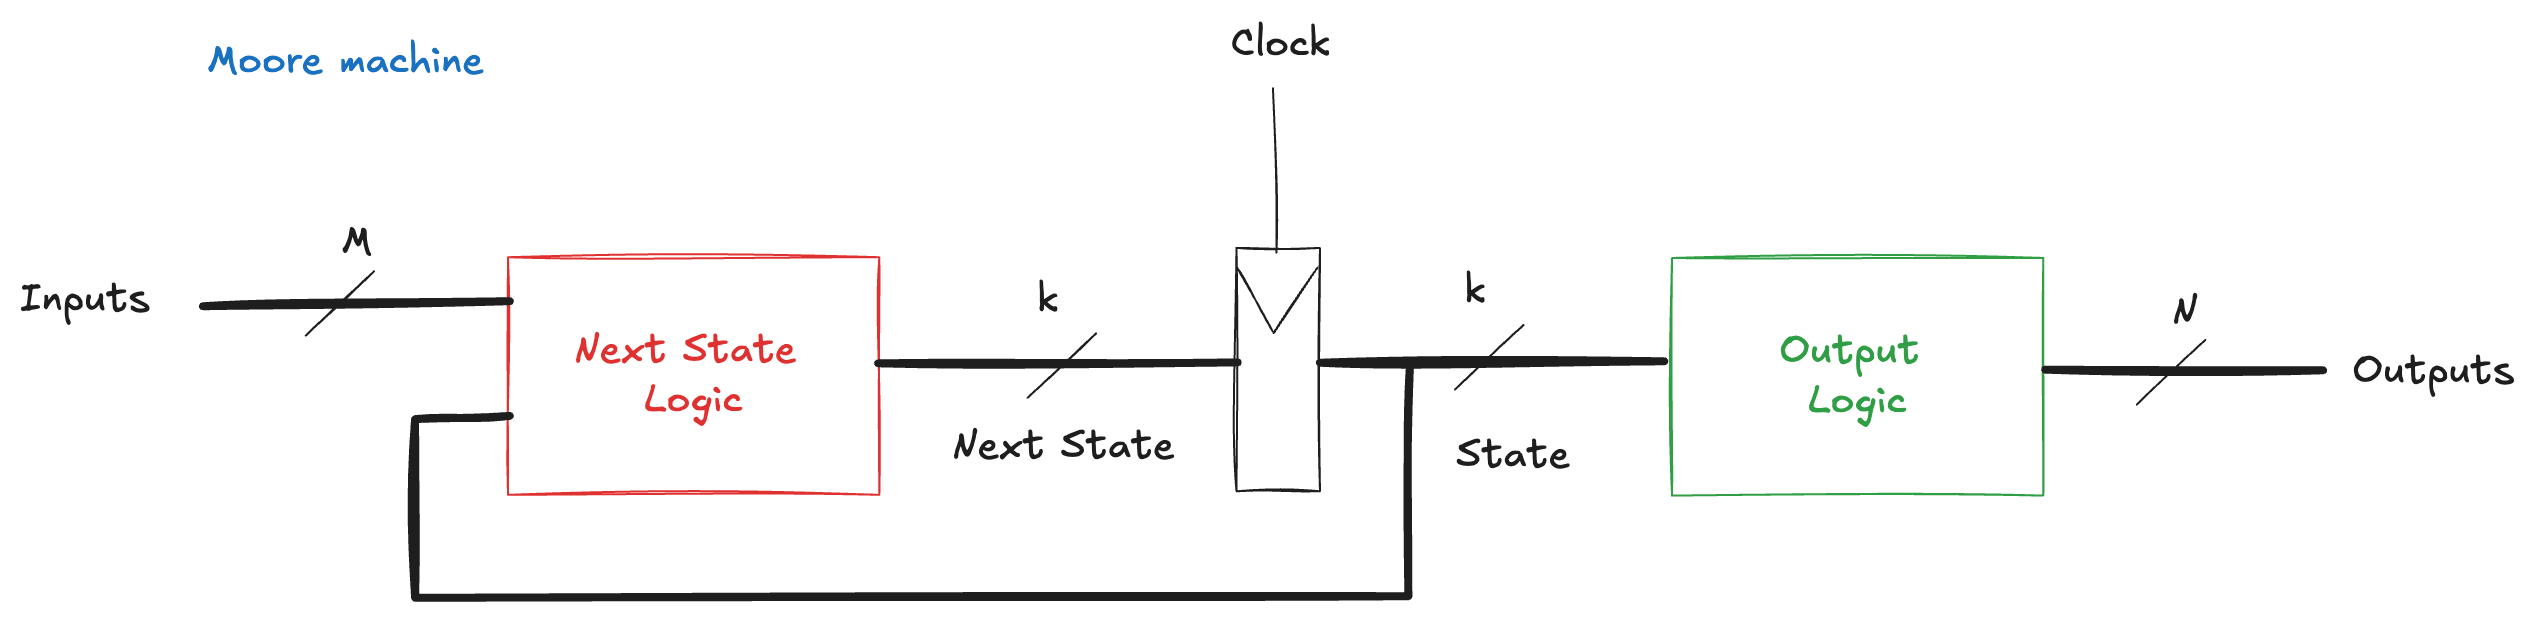

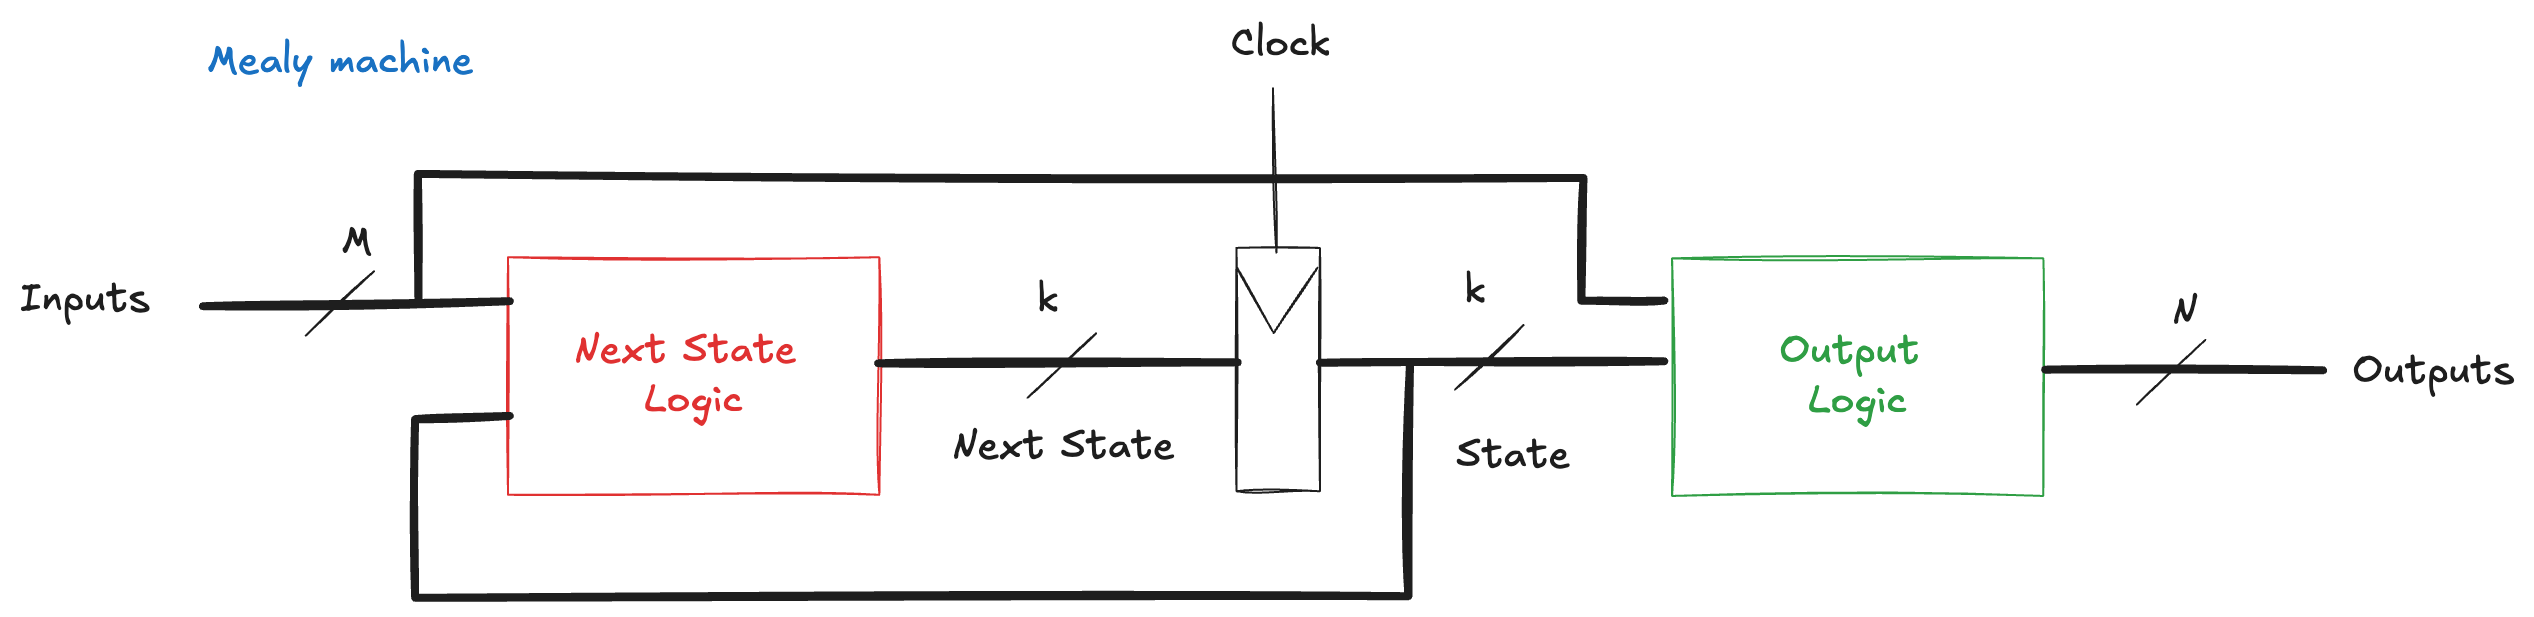

At each clock edge, the FSM transitions to the next state, which is determined by the current state and the inputs. Finite State Machines can be broadly categorized into two types based on how their outputs are defined: **Moore machines**, where the **outputs depend only on the current state**, and [**Mealy machines**](./papers/1955%20-%20A%20method%20for%20synthesizing%20sequential%20circuits.pdf), where the **outputs depend on both the current state and the current inputs**. FSMs provide a systematic and structured approach for designing synchronous sequential circuits that meet a given functional specification.

## State Transitions

To illustrate how to design FSMs, let’s consider the task of **creating a controller for a traffic light** at a busy intersection. The goal is to ensure an orderly and safe flow of vehicles by controlling the light signals based on the current state and input conditions. An FSM helps to define the possible states, the conditions for state transitions, and the resulting outputs, providing a clear and reliable solution to this kind of real-world control problem:

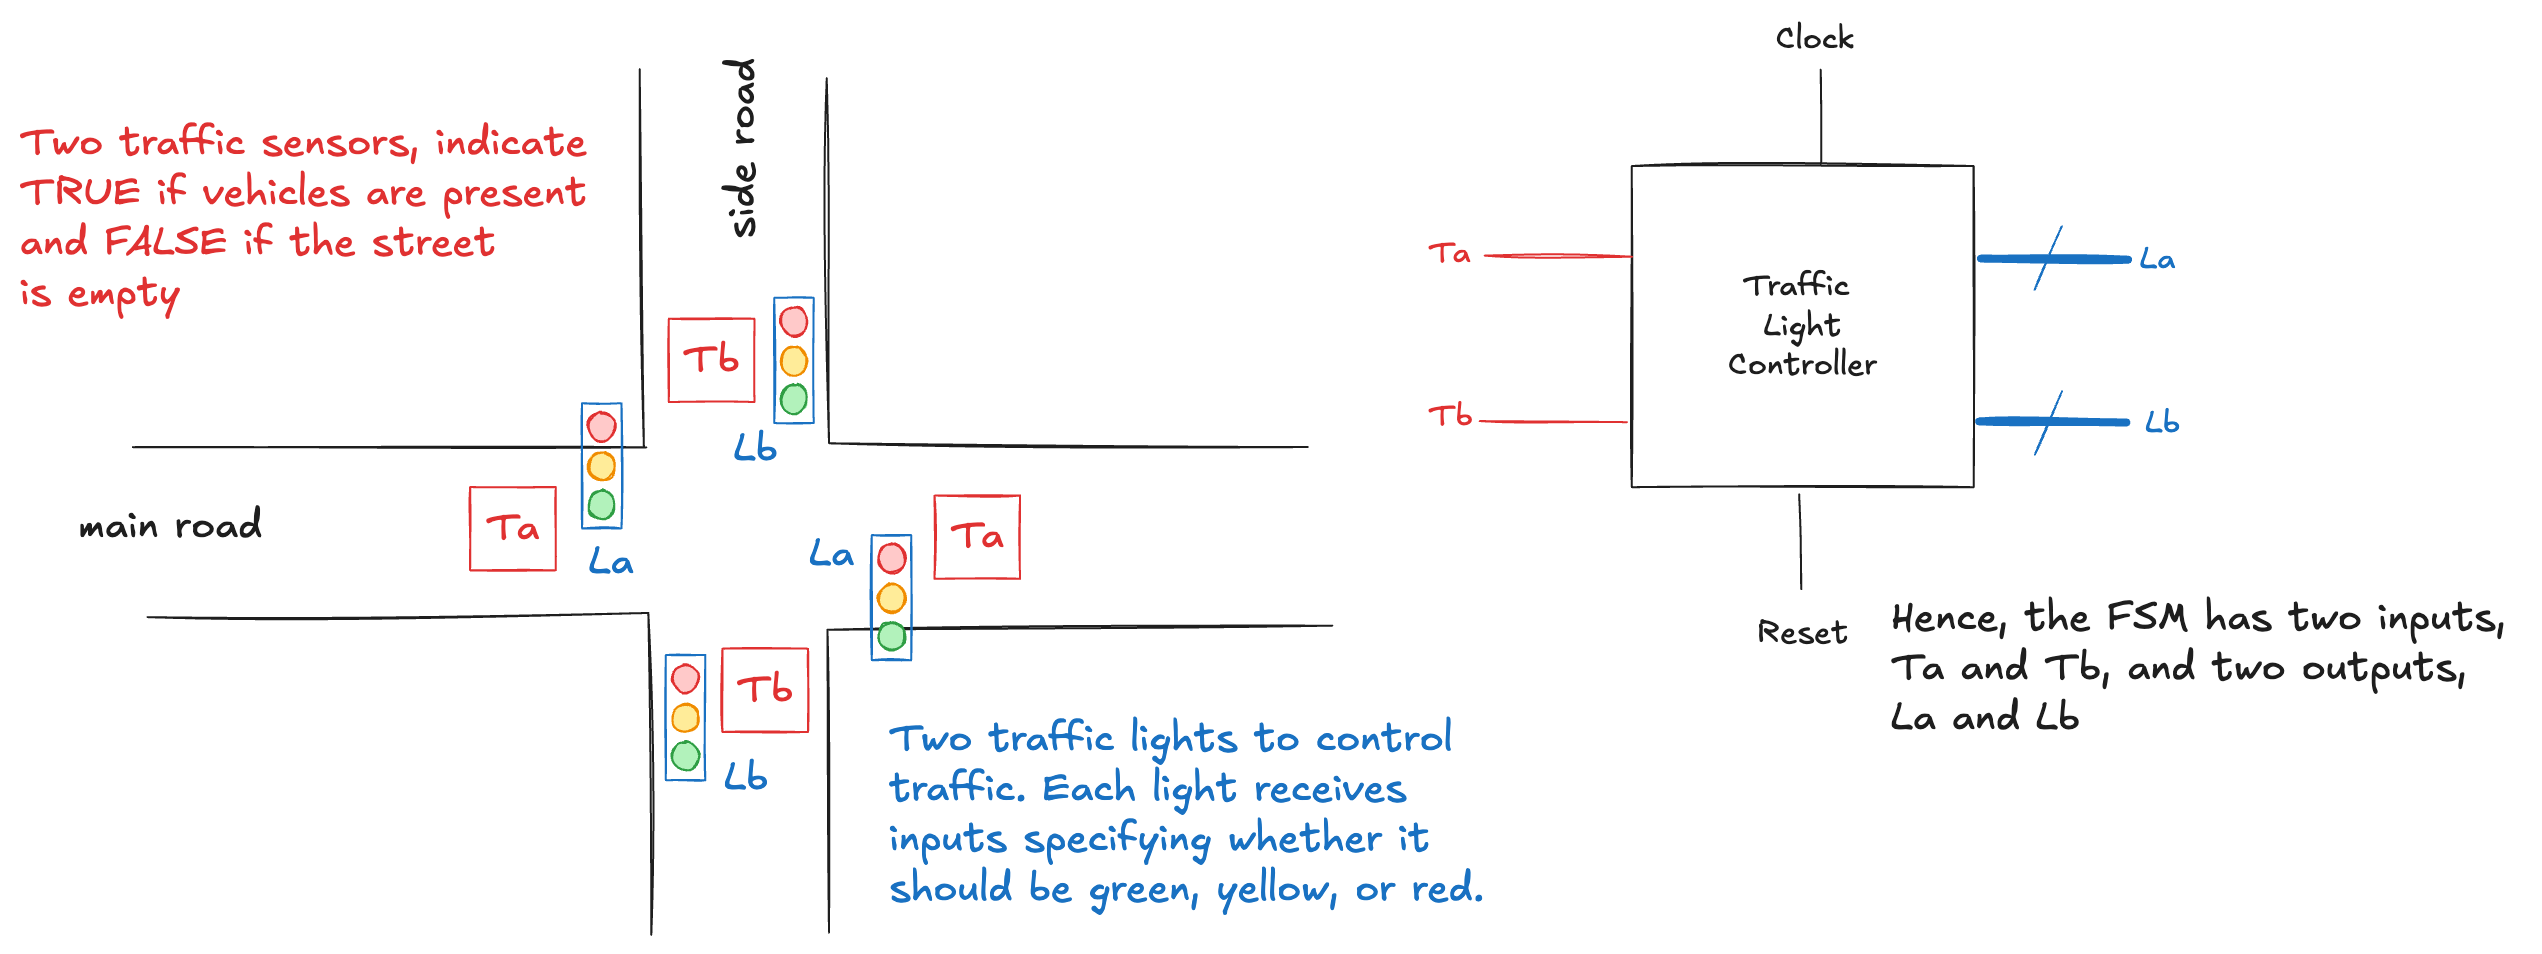

The traffic light controller uses information from traffic sensors to determine the color of each signal at every clock tick (rising edge). A reset button is used to place the controller into a known initial state when the system is powered on. To specify the details of the behavior of the system, we can use a **state transition diagram**, which shows all the possible states and the conditions for transitioning between them:

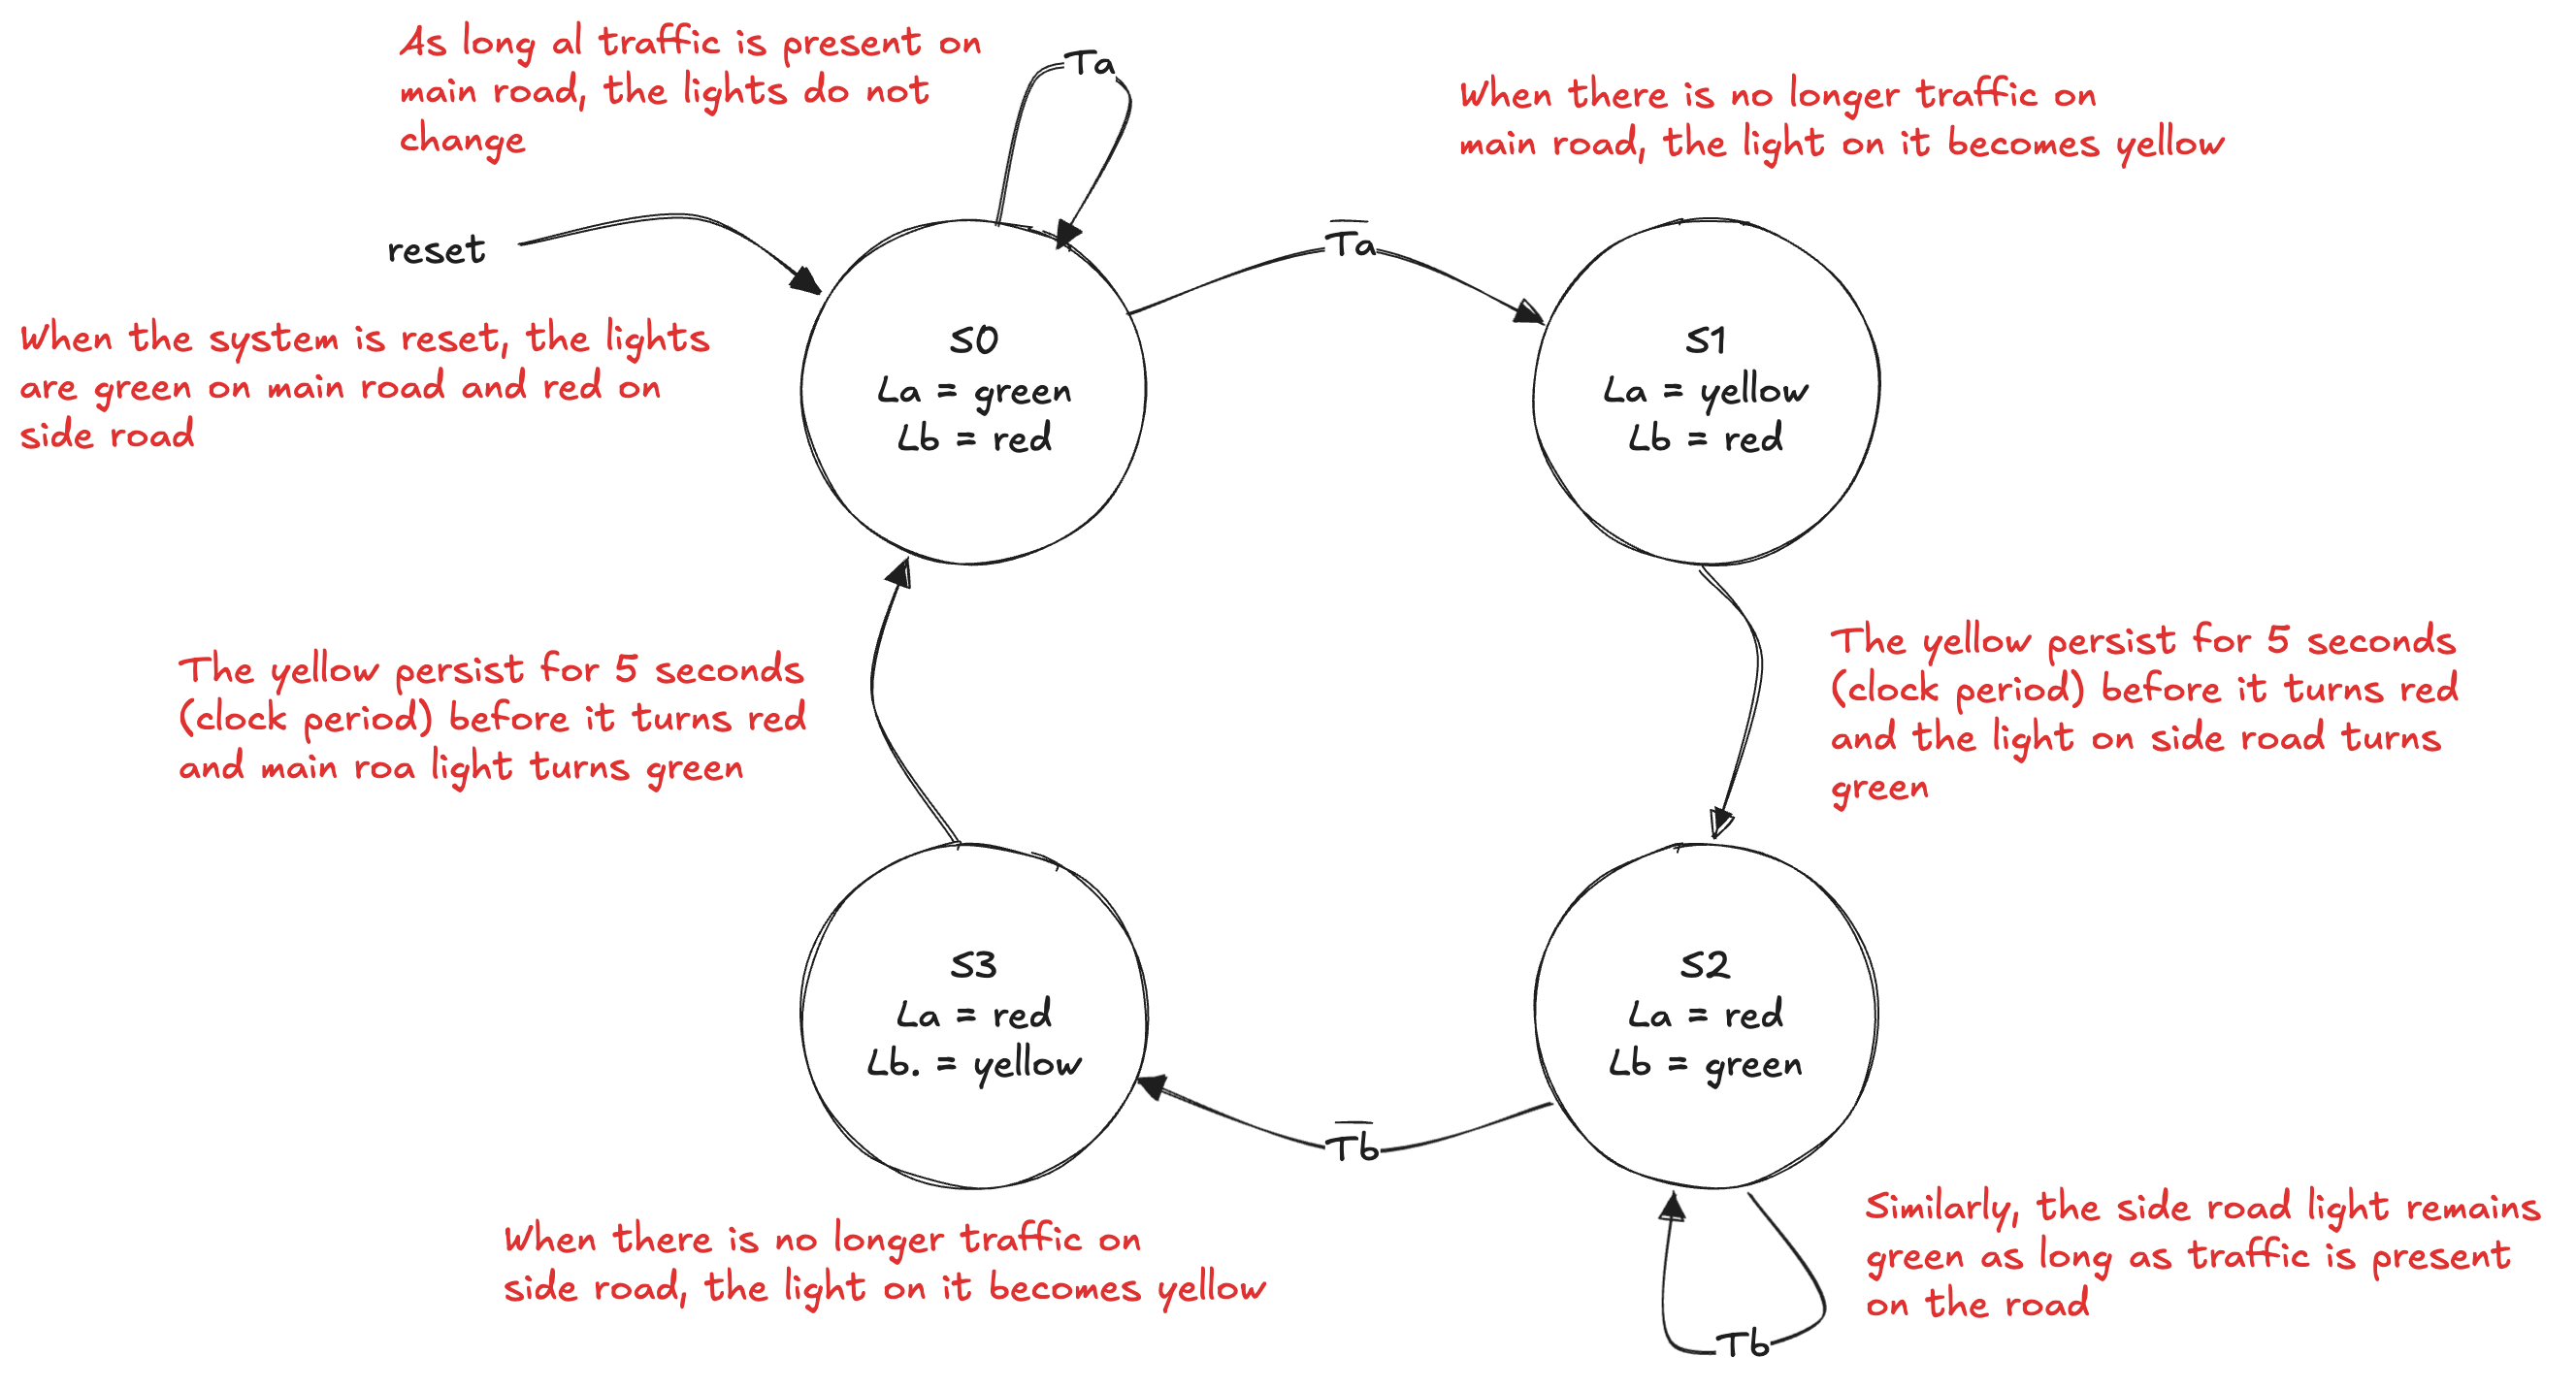

In a state transition diagram, **circles represent states**, and **arcs represent transitions between state**s. If a state has multiple outgoing arcs, each arc is labeled to indicate the input condition that triggers that transition. If a state has only one outgoing arc, the transition always occurs regardless of the inputs. Transitions take place on the rising edge of the clock, but it is not necessary to show the clock in the diagram because it only controls *when* the transitions occur, while the diagram specifies *which* transitions occur. The output values associated with each state are shown inside the corresponding state circle.

The state transition diagram can then be rewritten as a **state transition table**, which specifies what the next state $S'$ will be, for each combination of current state $S$ and input. Note that the table uses "don’t care" symbols for input conditions that do not affect the next state. Also, the reset signal is not included in the table; instead, we use **resettable flip-flops** that always force the system into a specific state upon reset, regardless of the inputs:

**State Transition Table:**

| $S$ | $Ta$ | $Tb$ | $S'$ |
|:---------------:|:--:|:--:|:--------------:|
| S0              | 0  | X  | S1             |
| S0              | 1  | X  | S0             |
| S1              | X  | X  | S2             |
| S2              | X  | 0  | S3             |
| S2              | X  | 1  | S2             |
| S3              | X  | X  | S0             |

## State Encodings

The state transition table is **abstract** because it uses symbolic labels for states (e.g., S0, S1, S2, S3). To implement an actual circuit, these **states must be assigned to binary encodings**. Simple encodings for this example are provided in the table below:

**State Encoding Table:**

| $S$ | $S_{1:0}$ |
|:---------:|:------------------:|
| S0        | 00                 |
| S1        | 01                 |
| S2        | 10                 |
| S3        | 11                 |


Now we update the state transition table to use the binary encodings, producing a **truth table** that defines the next state S' as a function of the current state S and the inputs. This is the representation of the **next-state logic** in the FSM:

**State Transition Truth Table:**

| $S_1$ | $S_0$ | $Ta$ | $Tb$ | $S'_1$ | $S'_0$ |
--------:|:------:|:--:|:--:|:------:|:------:|
| 0  | 0  | 0  | X  | 0   | 1   |
| 0  | 0  | 1  | X  | 0   | 0   |
| 0  | 1  | X  | X  | 1   | 0   |
| 1  | 0  | X  | 0  | 1   | 1   |
| 1  | 0  | X  | 1  | 1   | 0   |
| 1  | 1  | X  | X  | 0   | 0   |



From this truth table, it is straightforward to derive the boolean equations for the next state in sum-of-products form:


$\displaystyle S_1' = \overline{S_1} \; S_0 + S_1 \; \overline{S_0} \; \overline{Tb} + S_1 \; \overline{S_0} Tb$

$\displaystyle S_0' = \overline{S_1} \; \overline{S_0} \; \overline{Ta} + S_1 \; \overline{S_0} \; \overline{Tb}$

The equations can be simplified, for example using Karnaugh maps: 

$\displaystyle S_1' = S_1 \oplus S_0$

$\displaystyle S_0' = \overline{S_1} \; \overline{S_0} \; \overline{Ta} + S_1 \; \overline{S_0} \; \overline{Tb}$


## Output Logic

Similarly, we write an **output table** that indicates, for each state, what the output should be in that state:

**Output Table:**

| $S$ | $La$     | $Lb$     |
|:-----:|:------:|:------:|
| S0    | green  | red    |
| S1    | yellow | red    |
| S2    | red    | green  |
| S3    | red    | yellow |


The output table is abstract, like the state transition table, because it uses symbolic labels not only for states (e.g., S0, S1, S2, S3) but also for outputs (e.g., green, yellow, red). To implement an actual circuit, these **outputs must also be assigned to binary encodings**. Simple encodings for this example are provided in the table below:

**Output Encoding Table:**

| $La/b$ | $L_{1:0}$ |
|:------:|:-------------:|
| green  | 00            |
| yellow | 01            |
| red    | 10            |

Now we can write an **output truth table** that defines the outputs as a function of the current state. This is the representation of the **output logic** in the FSM:

**Output Truth Table:**

| $S_1$ | $S_0$ | $La_1$ | $La_0$ | $Lb_1$ | $Lb_0$ |
|:-----:|:-----:|:------:|:------:|:------:|:------:|
|  0    |  0    |  0  |  0  |  1  |  0  |
|  0 |  1 |  0  |  1  |  1  |  0  |
|  1 |  0 |  1  |  0  |  0  |  0  |
|  1 |  1 |  1  |  0  |  0  |  1  |

Again, it is straightforward to read off and simplify the boolean equations for the outputs:

$\displaystyle La_0 = \overline{S_1} \; S_0 $

$\displaystyle La_1 = S_1$

$\displaystyle Lb_0 = S_1 \; S_0$

$\displaystyle Lb_1 = \overline{S_1}$

## Composition

We can compose the Moore FSM by combining three main blocks: a 2-bit state register with clock and reset, the next-state logic (which computes the next state based on the current state and inputs), and the output logic (which generates the outputs based solely on the current state):

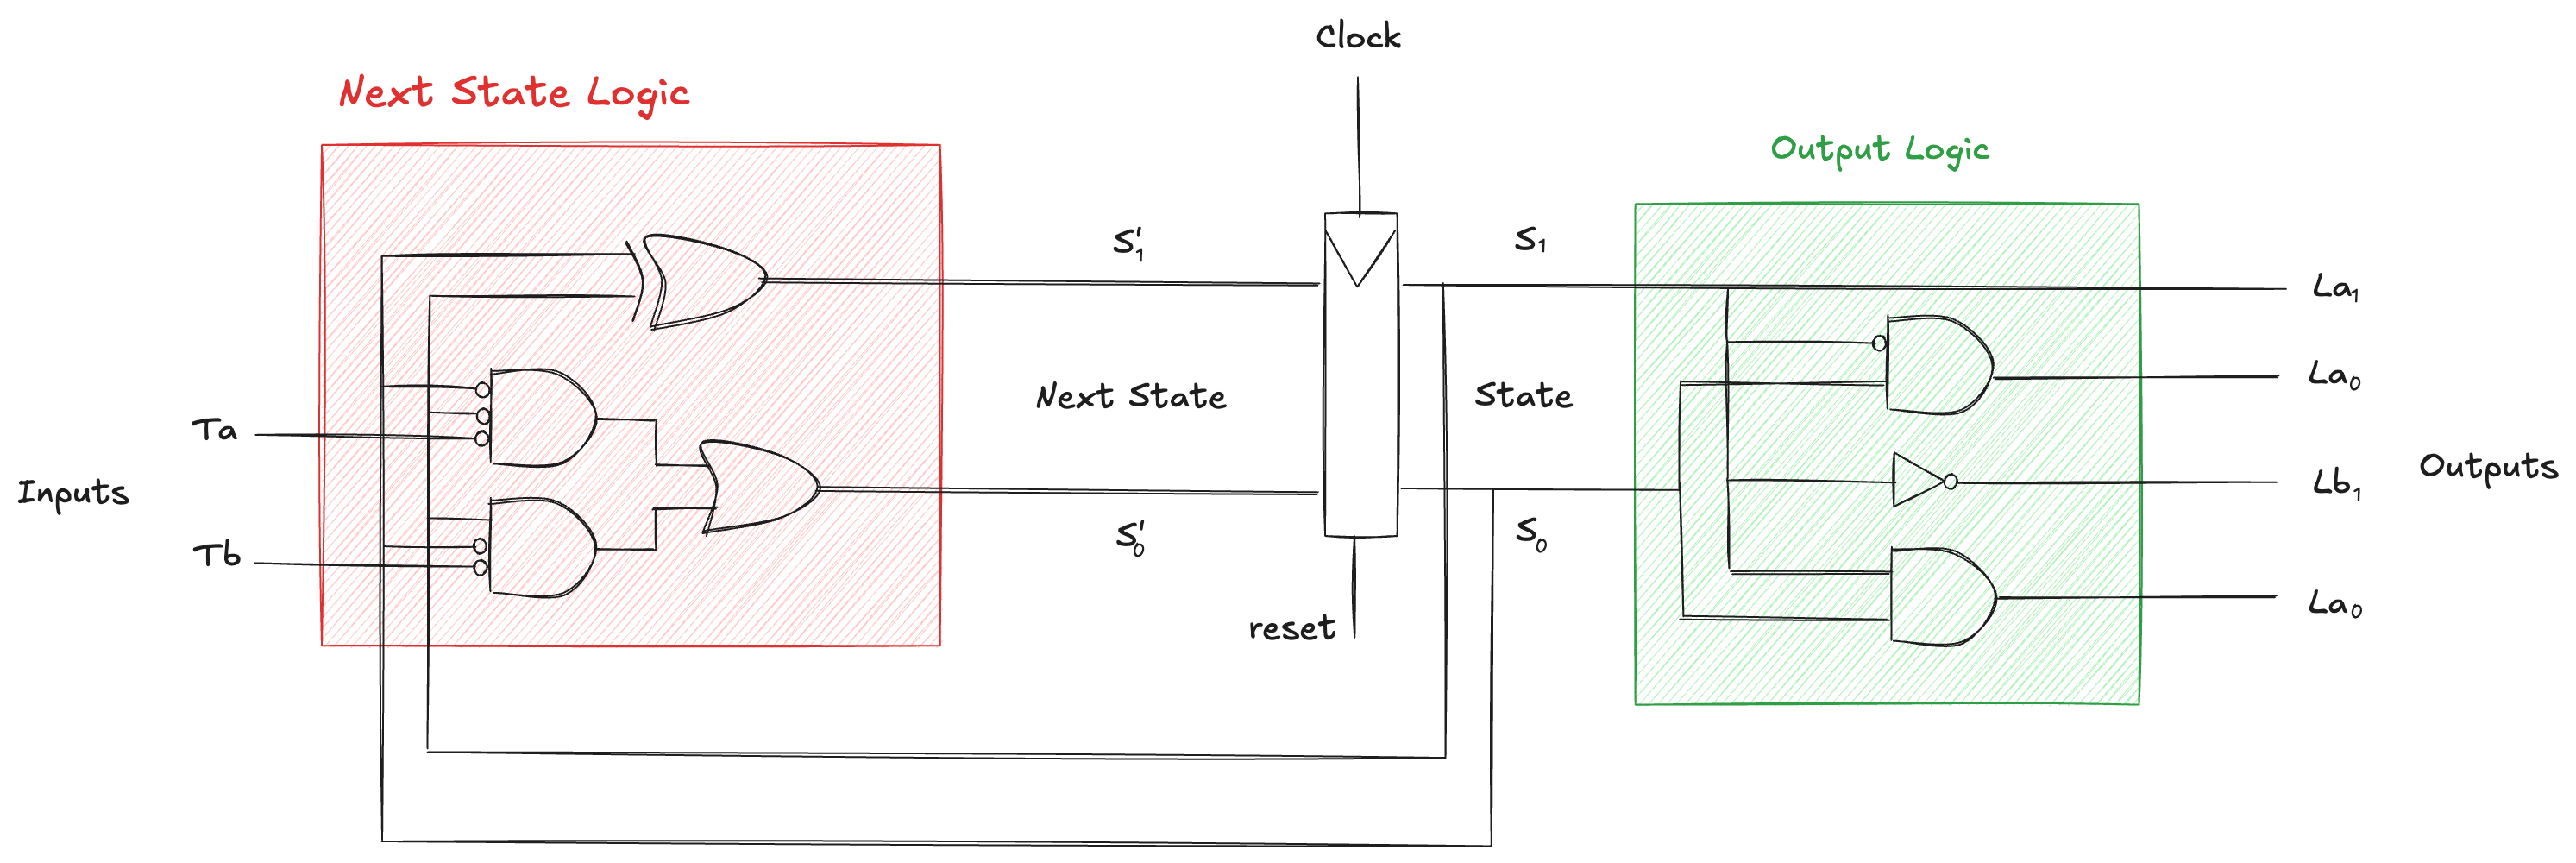

The schematic includes some AND gates with bubbles on their inputs, indicating inverted signals. These can be implemented in different ways: for example, using standard AND gates combined with input inverters, using NOR gates with inverters for the non-inverted inputs, or using other equivalent combinations of gates. The optimal choice depends on the specific implementation technology being used.

We can consider a timing diagram illustrating the traffic light controller
going through a sequence of states:

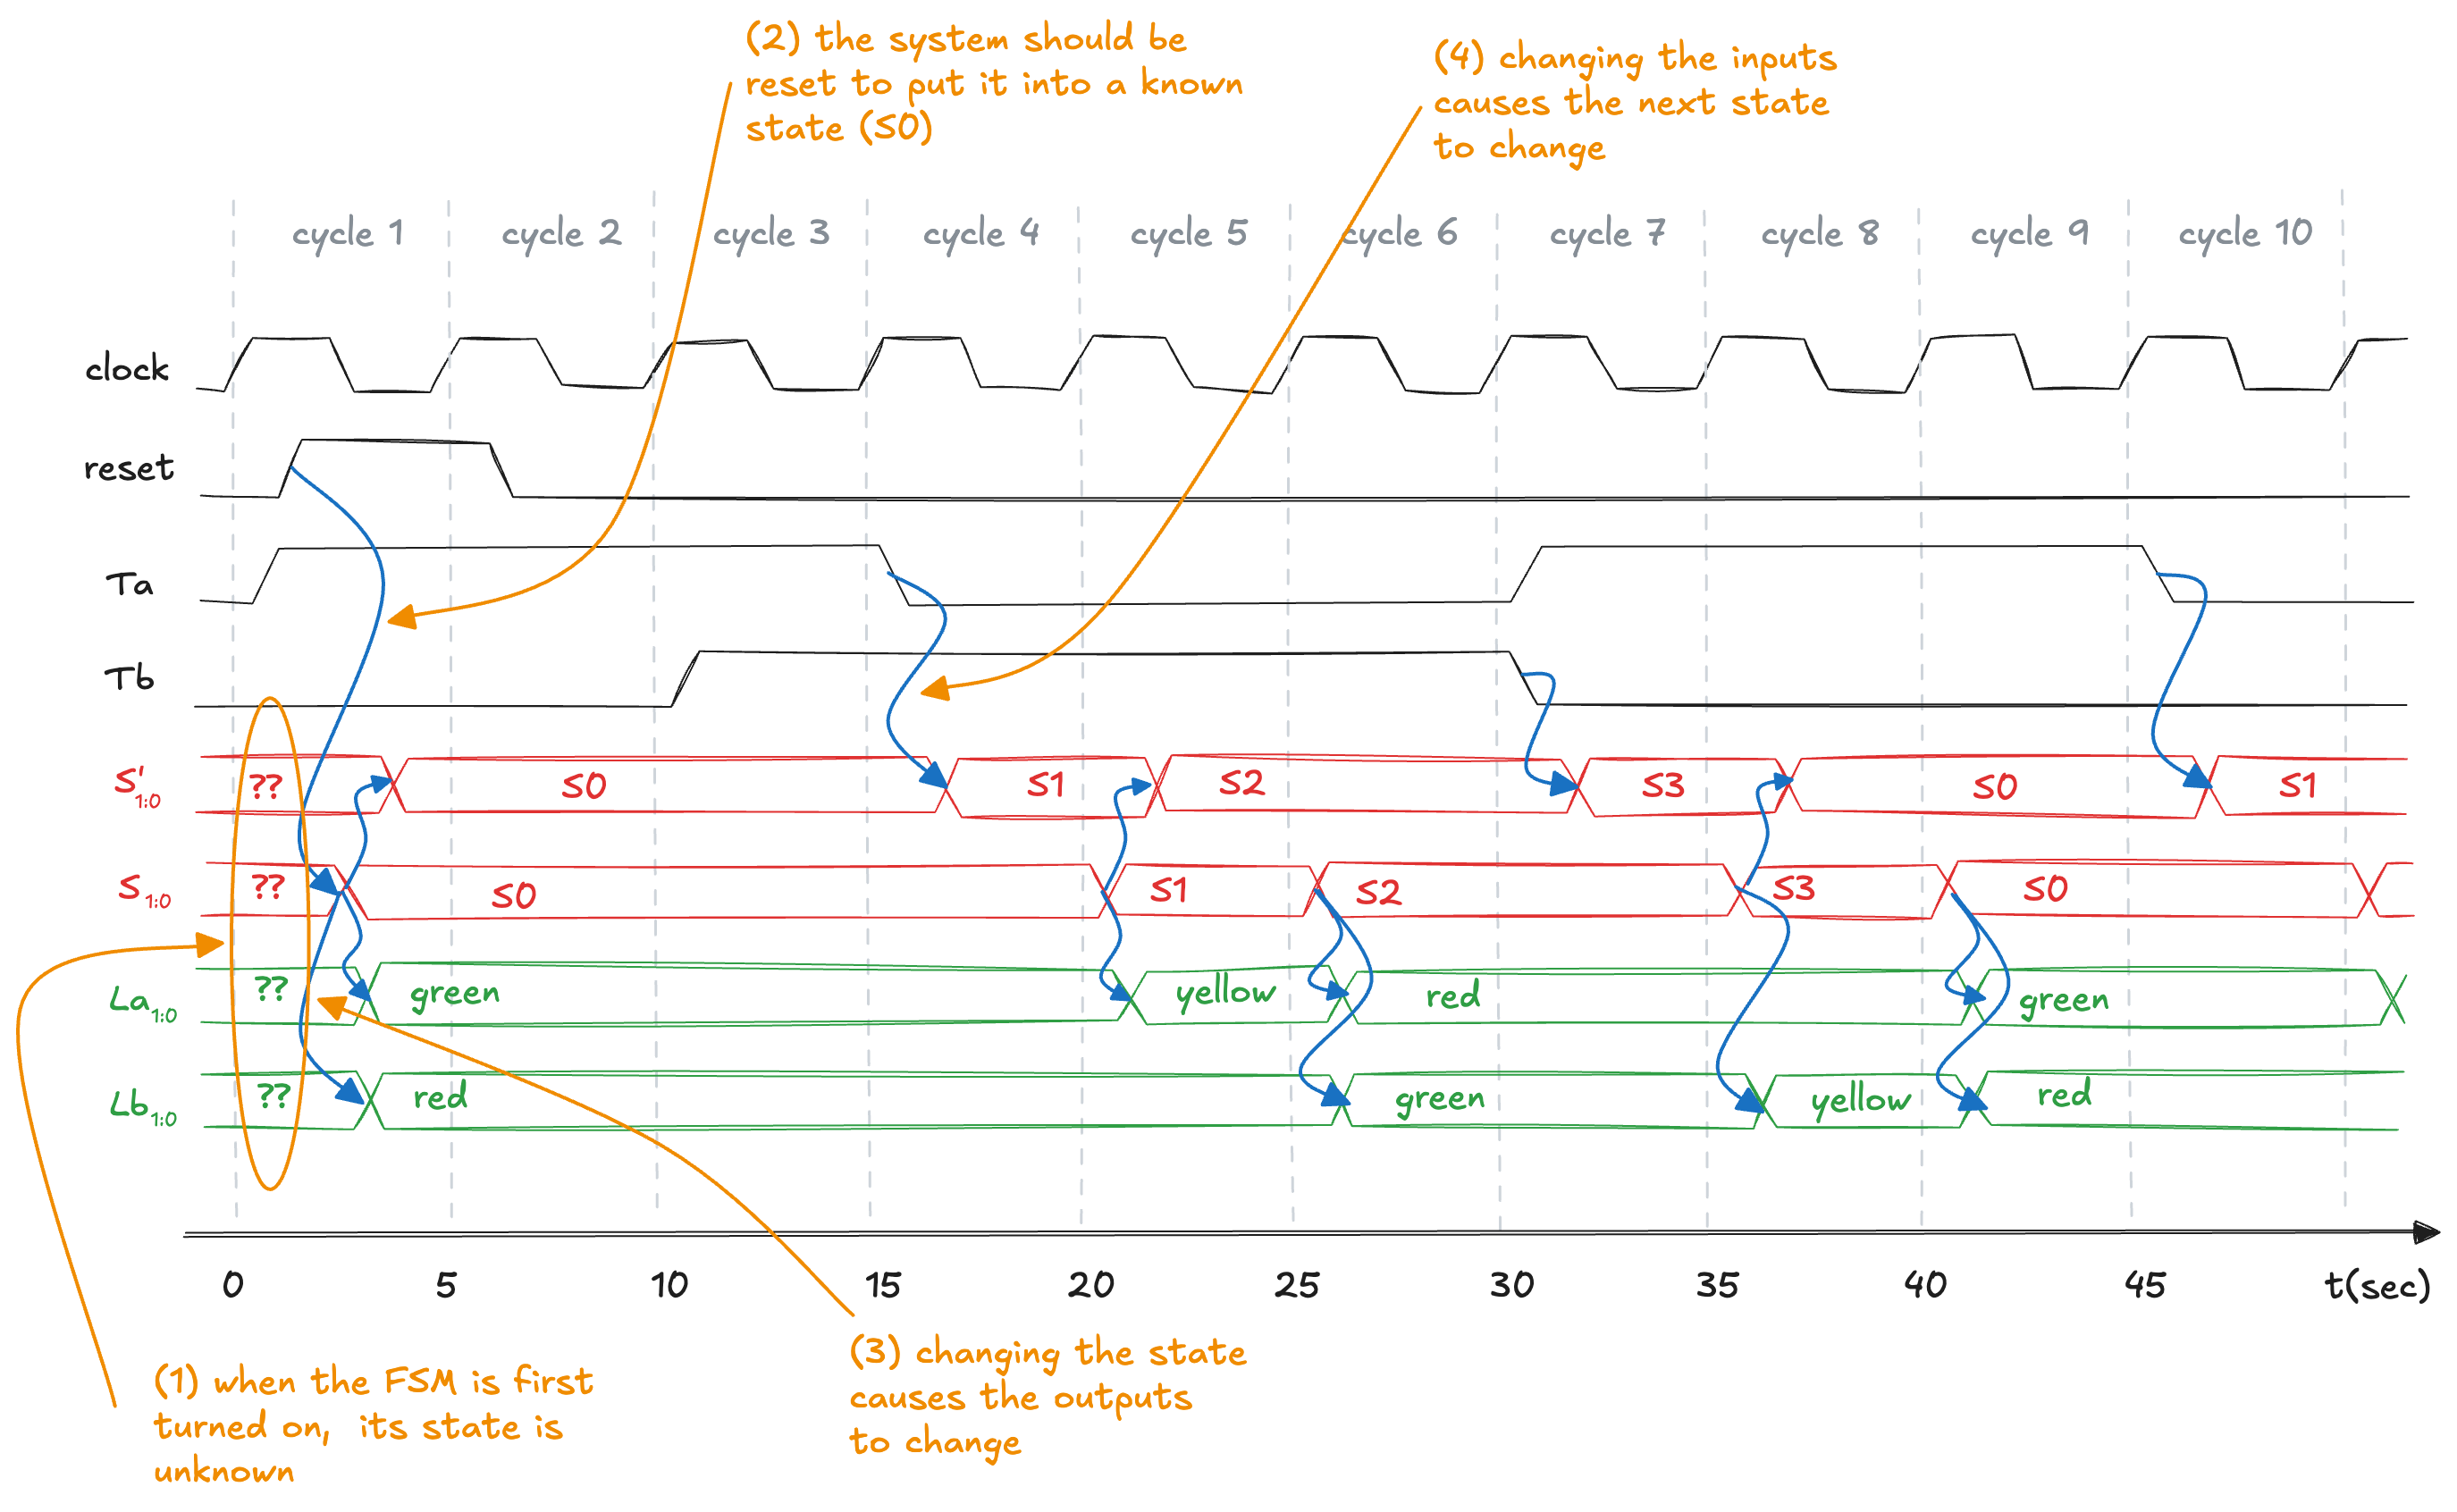

In this example, traffic arrives immediately on main road (Ta -> 1 before the reset), so the controller enters state S0, with the light green for main road and red for side road. It remains in this state even when traffic later appears on side road (Tb -> 1 at second 10). After 15 seconds, all traffic on main road has cleared (Ta -> 0). On the next clock edge, the controller transitions to state S1 (since Ta = 0), switching the light on main road to yellow. Five seconds later, at the next clock rising edge, it moves to state S2, where the light on main road turns red and the light on side road turns green to allow traffic on this road to pass. The controller stays in state S2 until all traffic on side road has cleared (Tb -> 0). It then advances to state S3, turning the light on side road to yellow. After another clock cycle (five seconds), the controller returns to state S0, turning the light on side road red and the light on main road green again.

## Binary vs One-hot Encoding

When designing FSMs, we need to choose how to encode the states and outputs. The choice of encoding can significantly affect the complexity of the circuit, including the number of logic gates and the speed of operation.

The state and output encodings can have a big impact on how many logic gates we need and how fast the circuit runs. Unfortunately, there is no simple, systematic method to guarantee the optimal encoding and trying every possible combination is impractical for large state machines. However, it’s often possible to select a good encoding by inspection, especially when related states or outputs can share common bits. Modern CAD tools also help by automatically exploring different encodings and choosing a reasonable one. Two common strategies are binary encoding and one-hot encoding:

- in **binary encoding**, each state is assigned a binary number, so a system with k states needs log_2(k) bits to represent all possible states. 
- in **one-hot encoding**, each state is assigned its own flip-flop, and exactly one flip-flop is "hot" (true) at any given time. For example, a one-hot FSM with three states would use encodings like 001, 010, and 100. This approach uses more flip-flops than binary encoding, but the next-state and output logic often becomes simpler, which can reduce the total number of gates. 

The best choice depends on the specific FSM and the target implementation technology.

For example, consider a **divide-by-n counter**. It has one output (Y) and no inputs. The output stays high for one clock cycle out of every n, effectively dividing the input clock frequency by n:

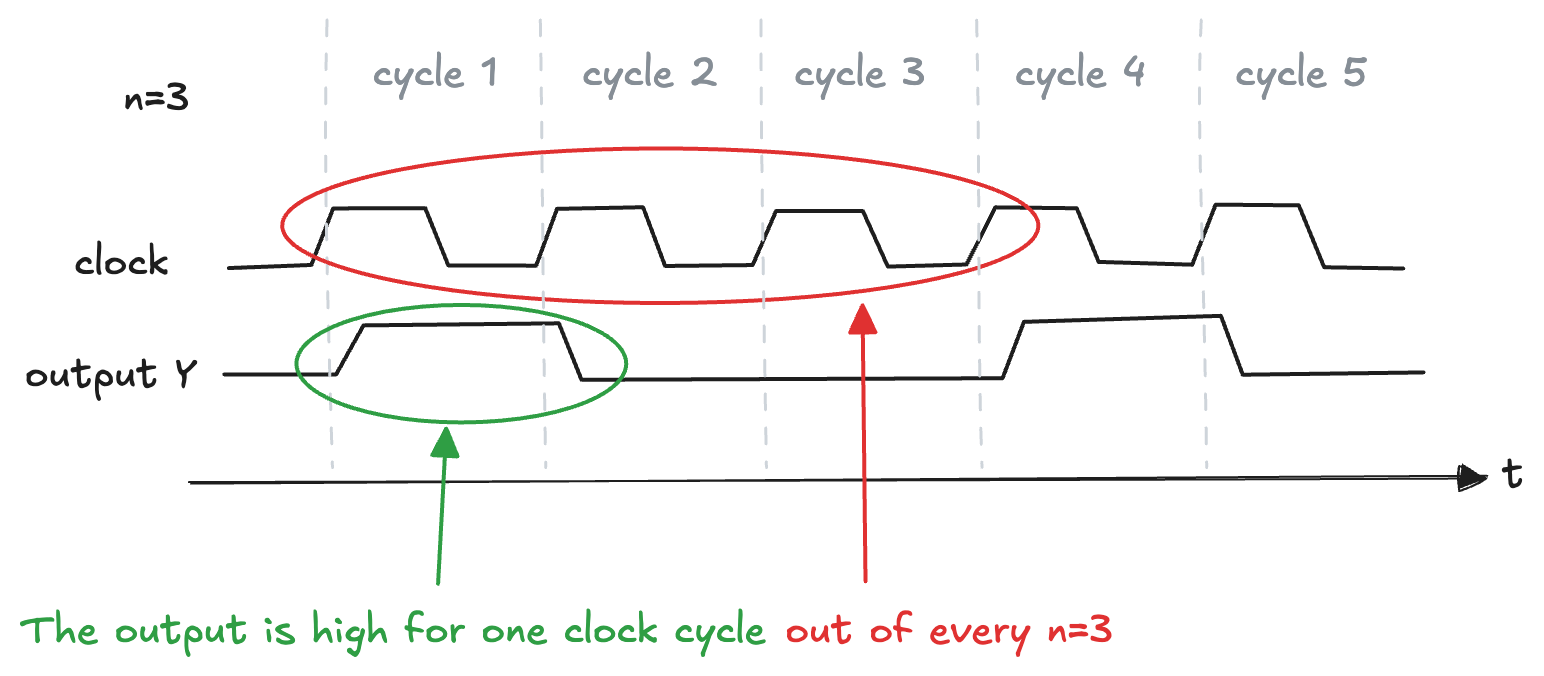

The state transition diagram is simple: 

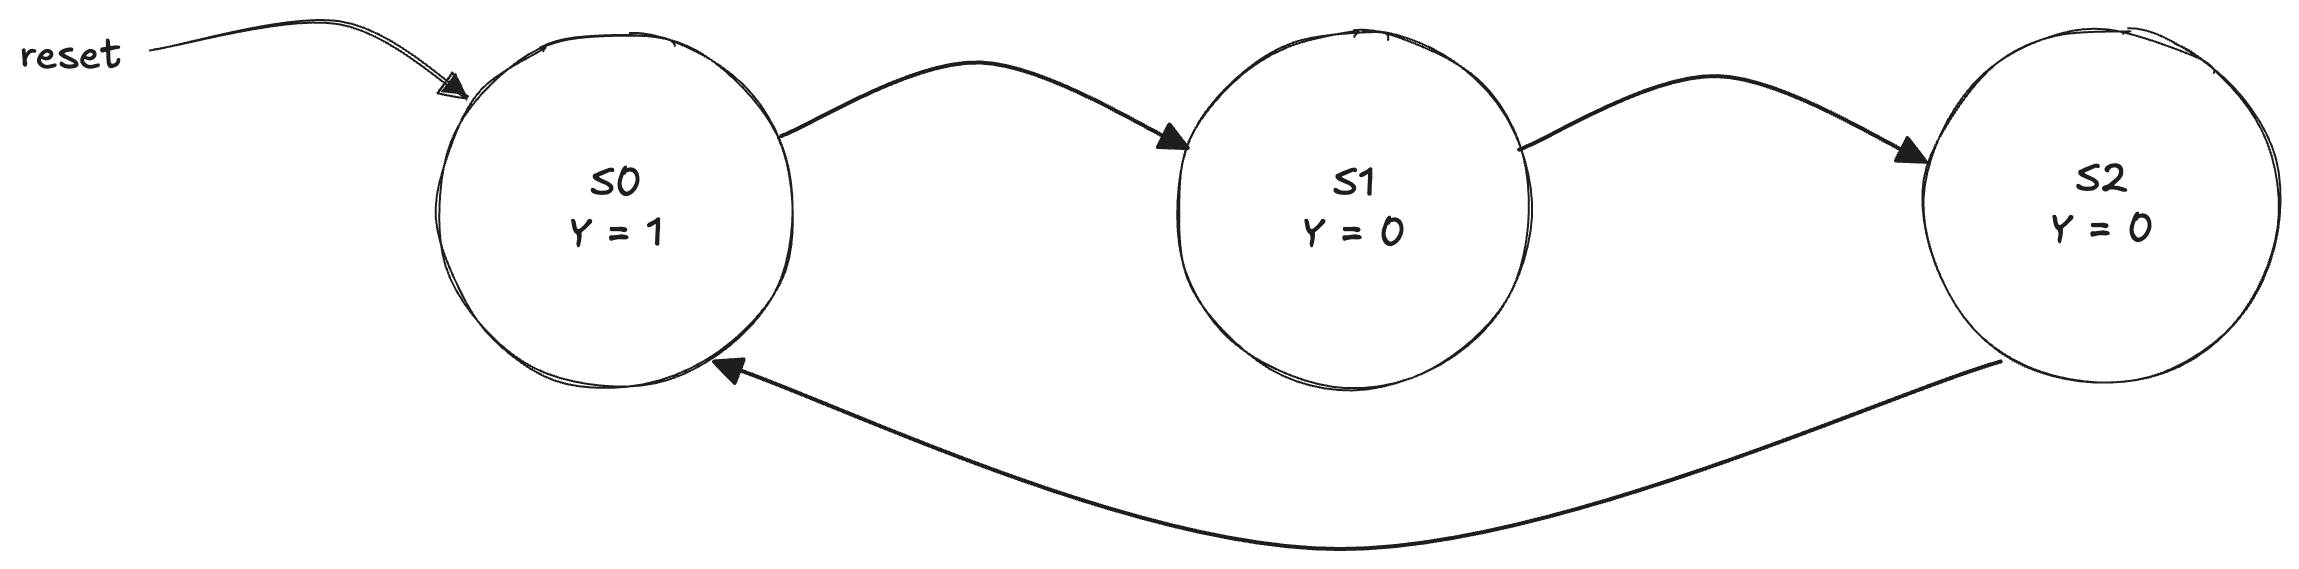

The state transition table is:

| $S$ | $S'$ |
|:---------------:|:--------------:|
| S0              | S1             |
| S1              | S2             |
| S2              | S0             |

The output table is:

| $S$ | $Y$ |
|:-------:|:---------:|
|   S0    |     1     |
|   S1    |     0     |
|   S2    |     0     |

We can compare the two encodings. 

One-hot encoding:

| $S$ | $S_2$ | $S_1$ | $S_0$ 
|:-------:|:-----------:|:-----------:|:-----------:|
|   S0    |      0      |      0      |      1      |
|   S1    |      0      |      1      |      0      |
|   S2    |      1      |      0      |      0      |

Binary encoding:

| $S$ | $S_1$ | $S_0$
|:-------:|:---------:|:---------:|
|   S0    |     0     |     0     |
|   S1    |     0     |     1     |
|   S2    |     1     |     0     |

The binary encoding uses two bits of state. Using this encoding, the state transition table can be written as follows:

| $S_1$ | $S_0$ | $S'_1$ | $S'_0$ |
|:-----:|:-----:|:------:|:------:|
|   0   |   0   |   0    |   1    |
|   0   |   1   |   1    |   0    |
|   1   |   0   |   0    |   0    |

Notice that this FSM only has 3 states, so one of the possible 2-bit codes is unused. In particular, the state (11) is not reachable in normal operation. By design, you assume that the FSM never enters this state, so it is not included in the state transition table.

Note that there are no inputs and the next state depends only on the current state. The next state equations are:

$\displaystyle S_1' = \overline{S_1} \; S_0$    
$\displaystyle S_0' = \overline{S_1} \; \overline{S_0}$ 

Then we can write the output table as follows:

| $S_1$ | $S_0$ |  $Y$     |
|:-----:|:-----:|:--------:|
|   0   |   0   |     1    |
|   0   |   1   |     0    |
|   1   |   0   |     0    |

The output equation is:

$\displaystyle Y = \overline{S_1} \; \overline{S_0}$       

Finally, the schematic becomes:

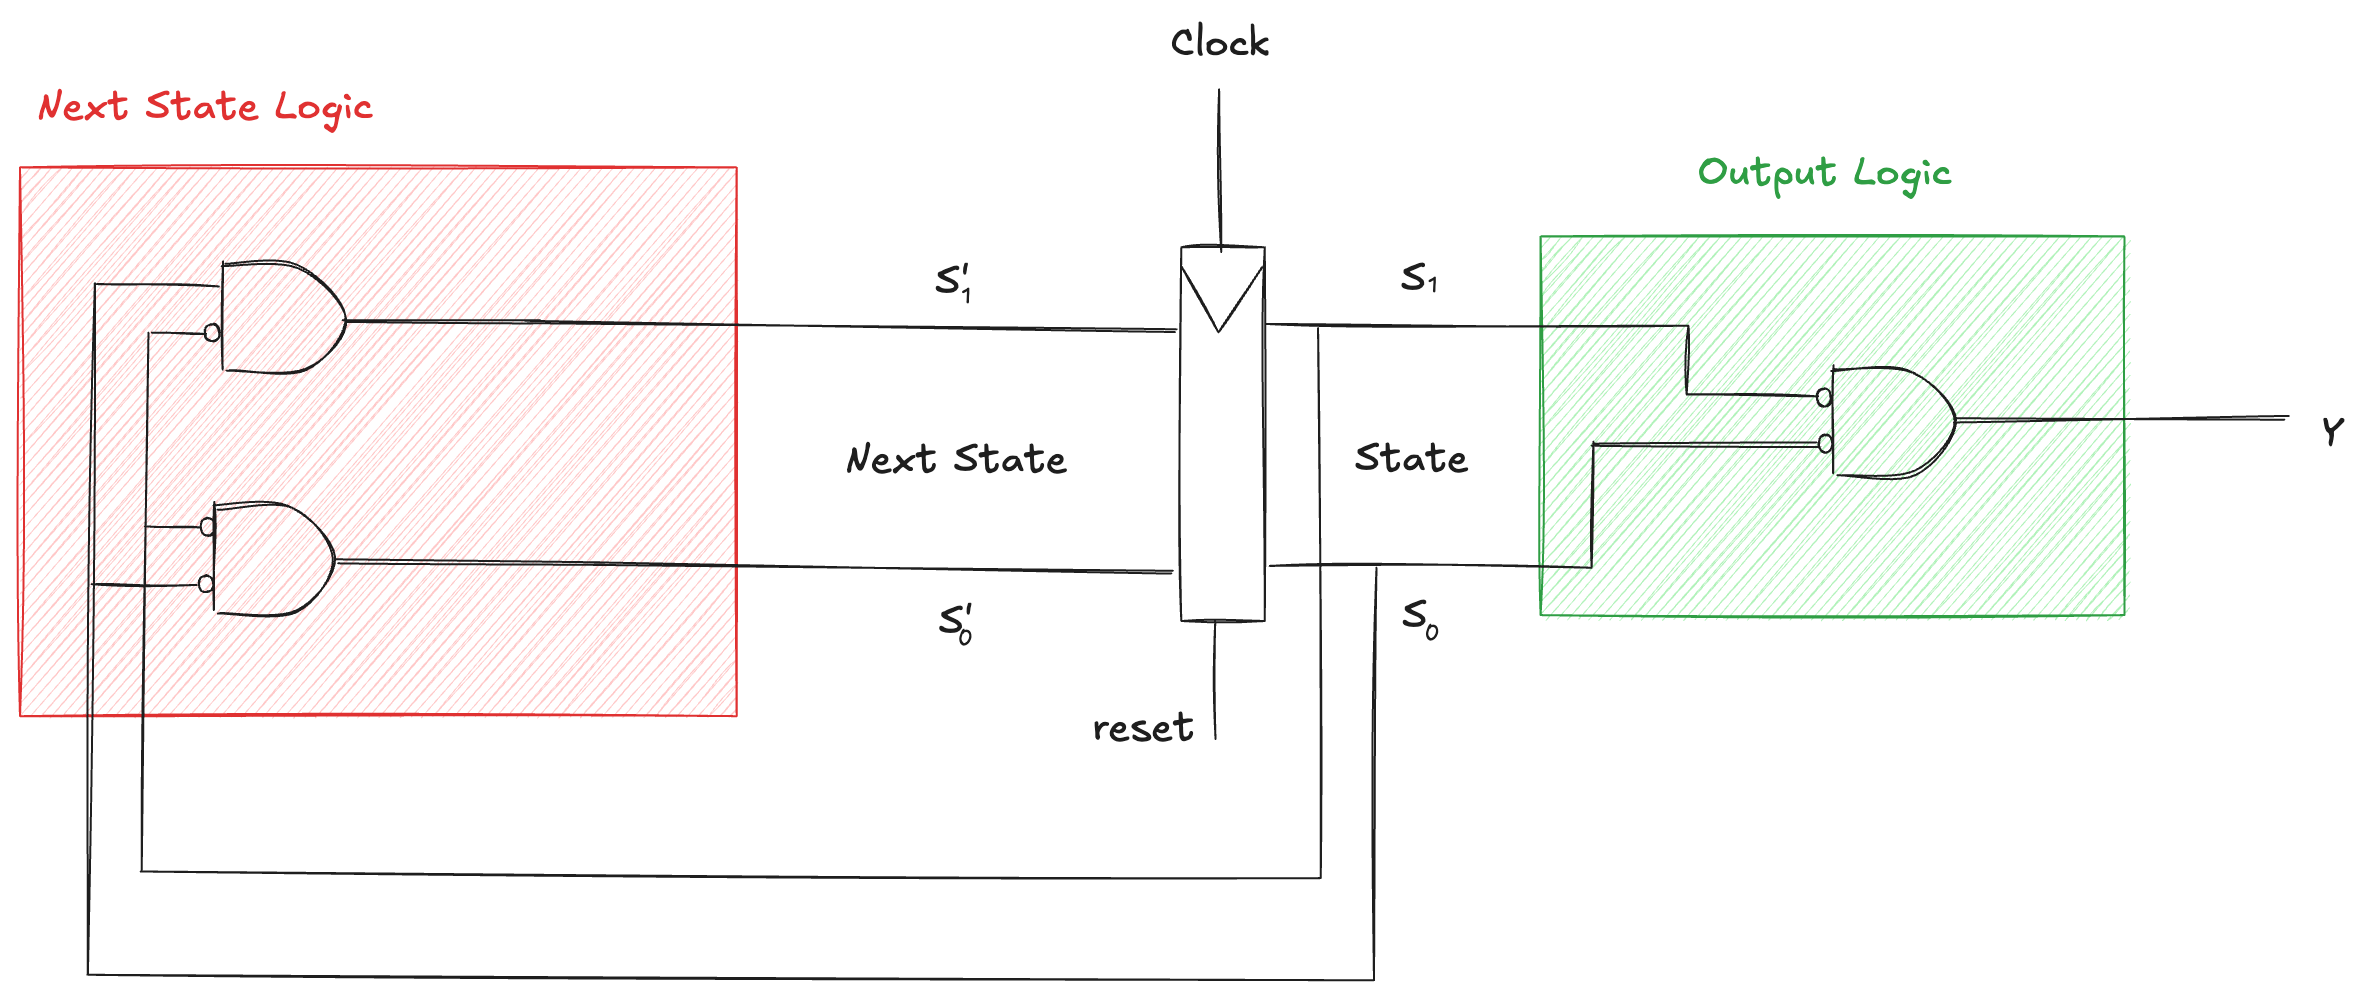

Note that the hardware design could be optimized to share the same gate for output and bit 0 of the state.

The one-hot encoding uses three bits of state and its state transition table is:

| $S_2$ | $S_1$ | $S_0$ | $S'_2$ | $S'_1$ | $S'_0$ |
|:-----:|:-----:|:-----:|:------:|:------:|:------:|
|   0   |   0   |   1   |   0    |   1    |   0    |
|   0   |   1   |   0   |   1    |   0    |   0    |
|   1   |   0   |   0   |   0    |   0    |   1    |

The equatoins for the next state are:

$\displaystyle S_2' = S_1$      
$\displaystyle S_1' = S_0$      
$\displaystyle S_0' = S_2$

The output table is:

| $S_2$ | $S_1$ | $S_0$ |   $Y$    |
|:-----:|:-----:|:-----:|:--------:|
|   0   |   0   |   1   |     1    |
|   0   |   1   |   0   |     0    |
|   1   |   0   |   0   |     0    |

The output logic equation is:

$\displaystyle Y = S_0$

The schematic for the one-hot encoding is:

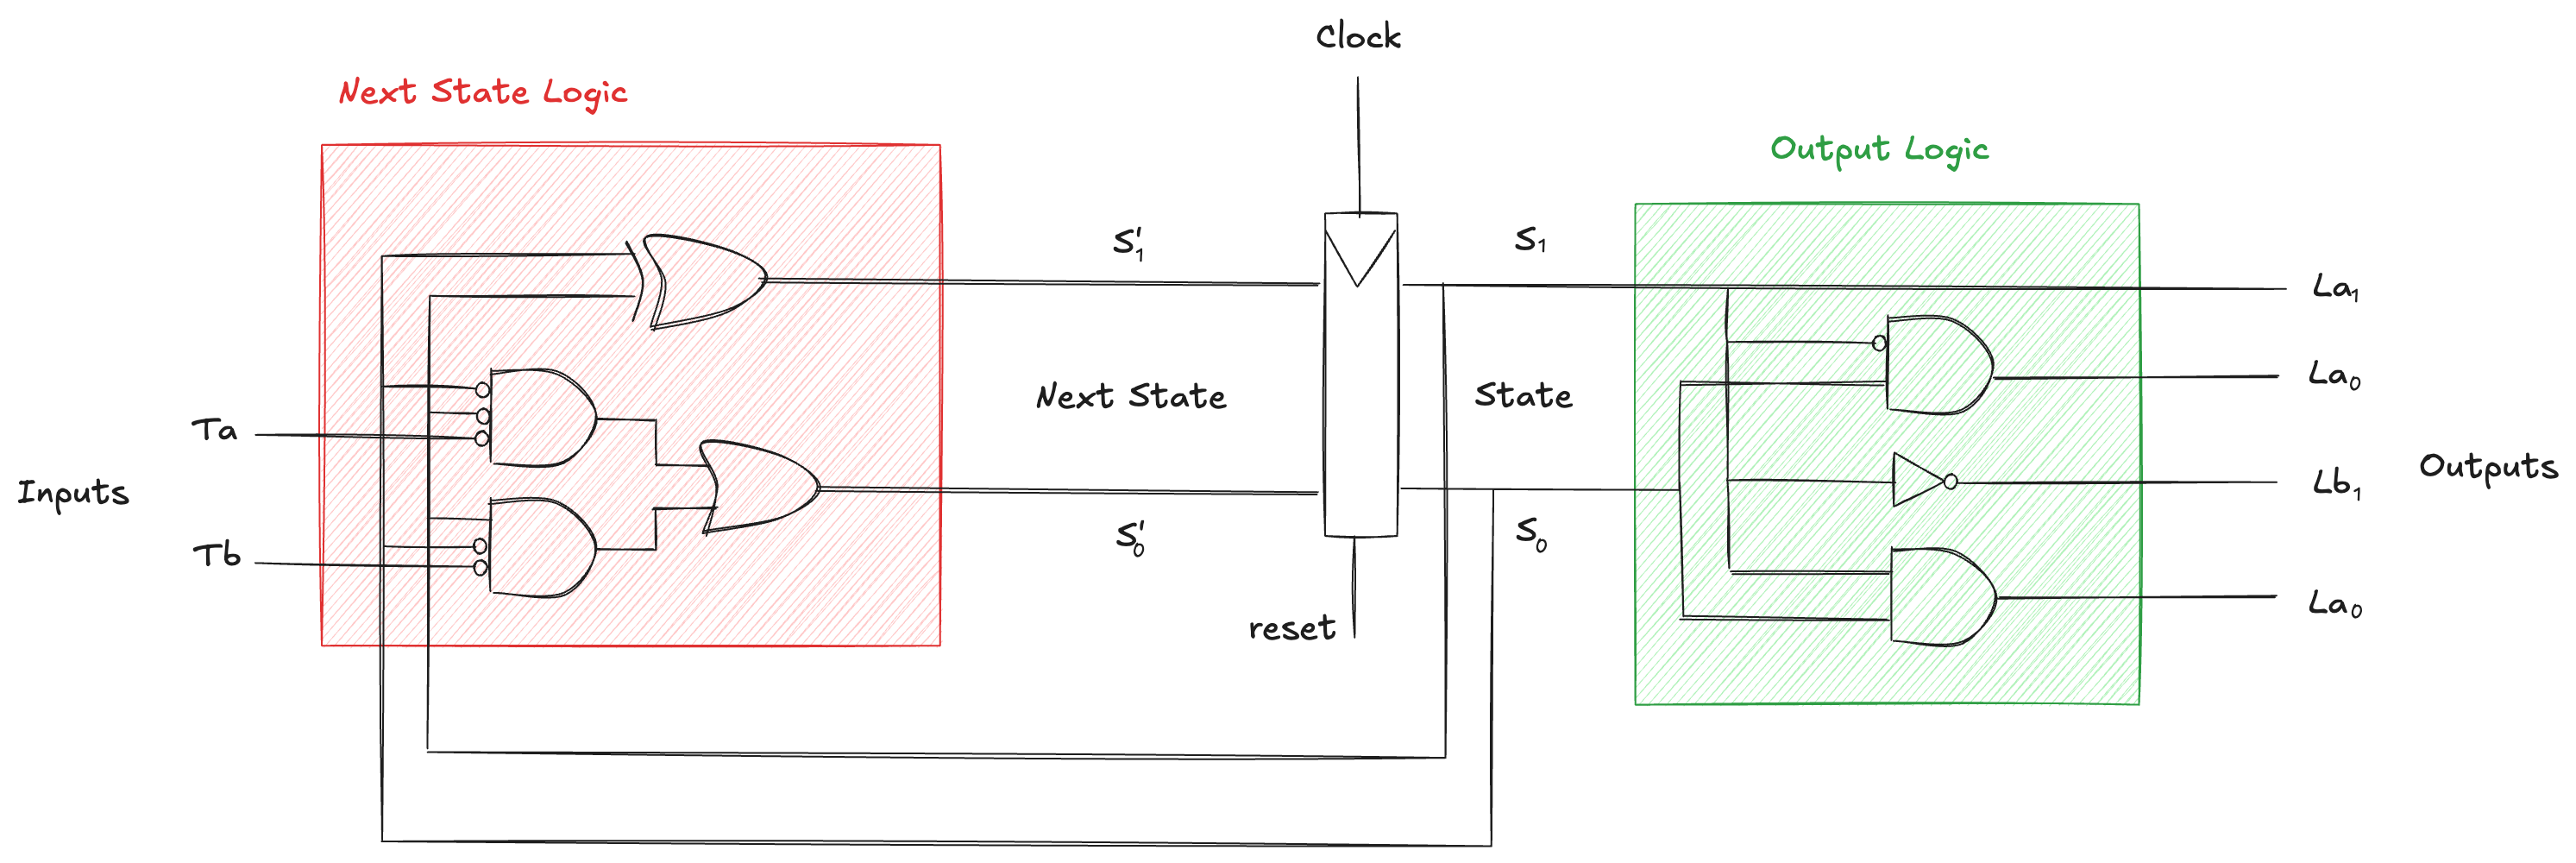

The best implementation choice depends on the relative cost of gates and flip-flops, but the one-hot design is usually preferable for this specific example.

## Moore vs Mealy machines

So far, we’ve looked at examples of Moore machines, where the outputs depend only on the current state of the system. In state transition diagrams, the outputs are shown inside the state circles. Mealy machines are similar, but with one important difference: their outputs can depend on both the current state and the current inputs. For this reason, in state transition diagrams, the **outputs are labeled on the arcs (transitions) rather than inside the circles**. The block of combinational logic that generates the outputs uses both the state and the inputs.

In order to illustrate the difference, let’s consider a simple example problem: we need to scans a serial input stream of bits A, one bit per clock cycle. The system should assert an output signal Y whenever the last two input bits are 0 followed by 1. The FSM must keep track of the recent input history to determine when the sequence "01" has just been seen.

The state transition diagram of a Moore machiene for this problem is as follows:

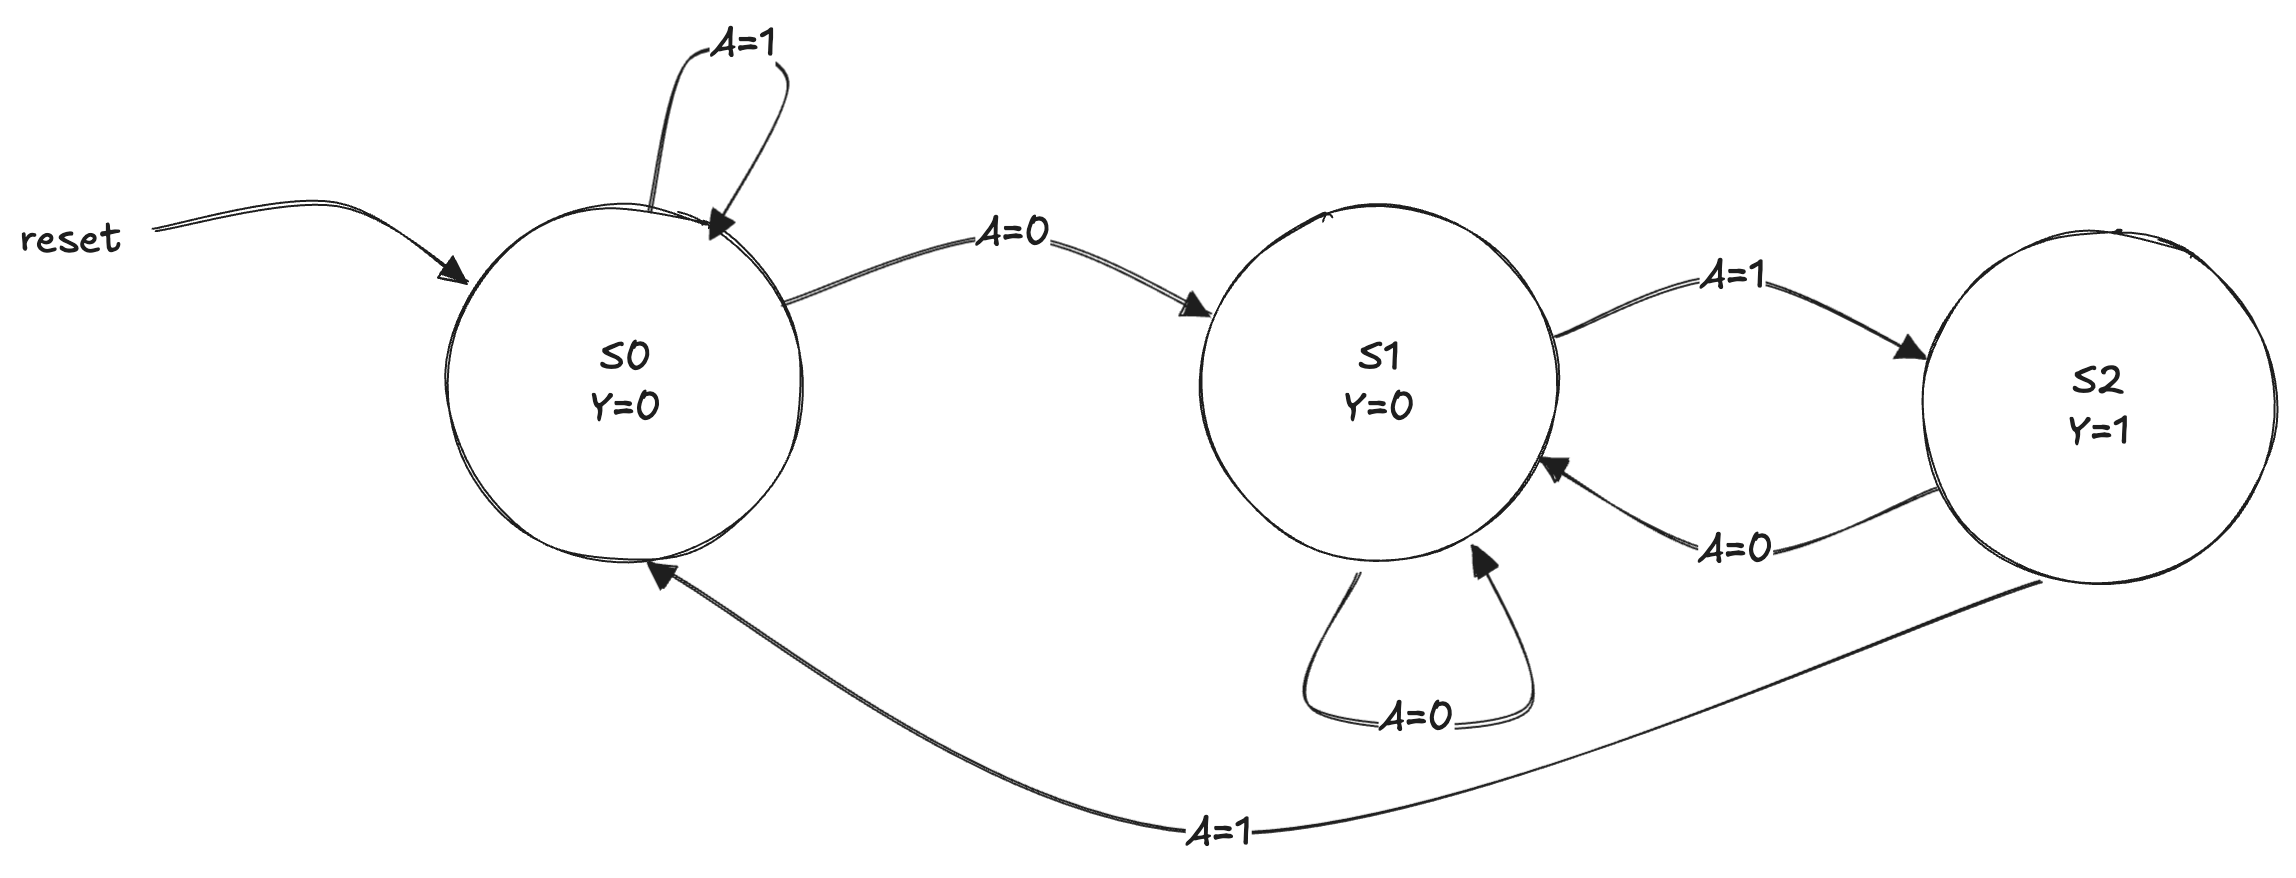

The FSM starts in S0 after reset, waiting for a 0. When a 0 is received, it moves to S1, remembering that the last bit was 0. If the next bit is 1, the FSM moves to S2 and the output goes high because "01" has just been seen. After that, it transitions back to either S0 (if the new bit is 1, since is not helpful for "01") or S1 (if the new bit is 0, since the trailing 0 may start a new "01" sequence).

The Mealy machine for the same problem is as follows:

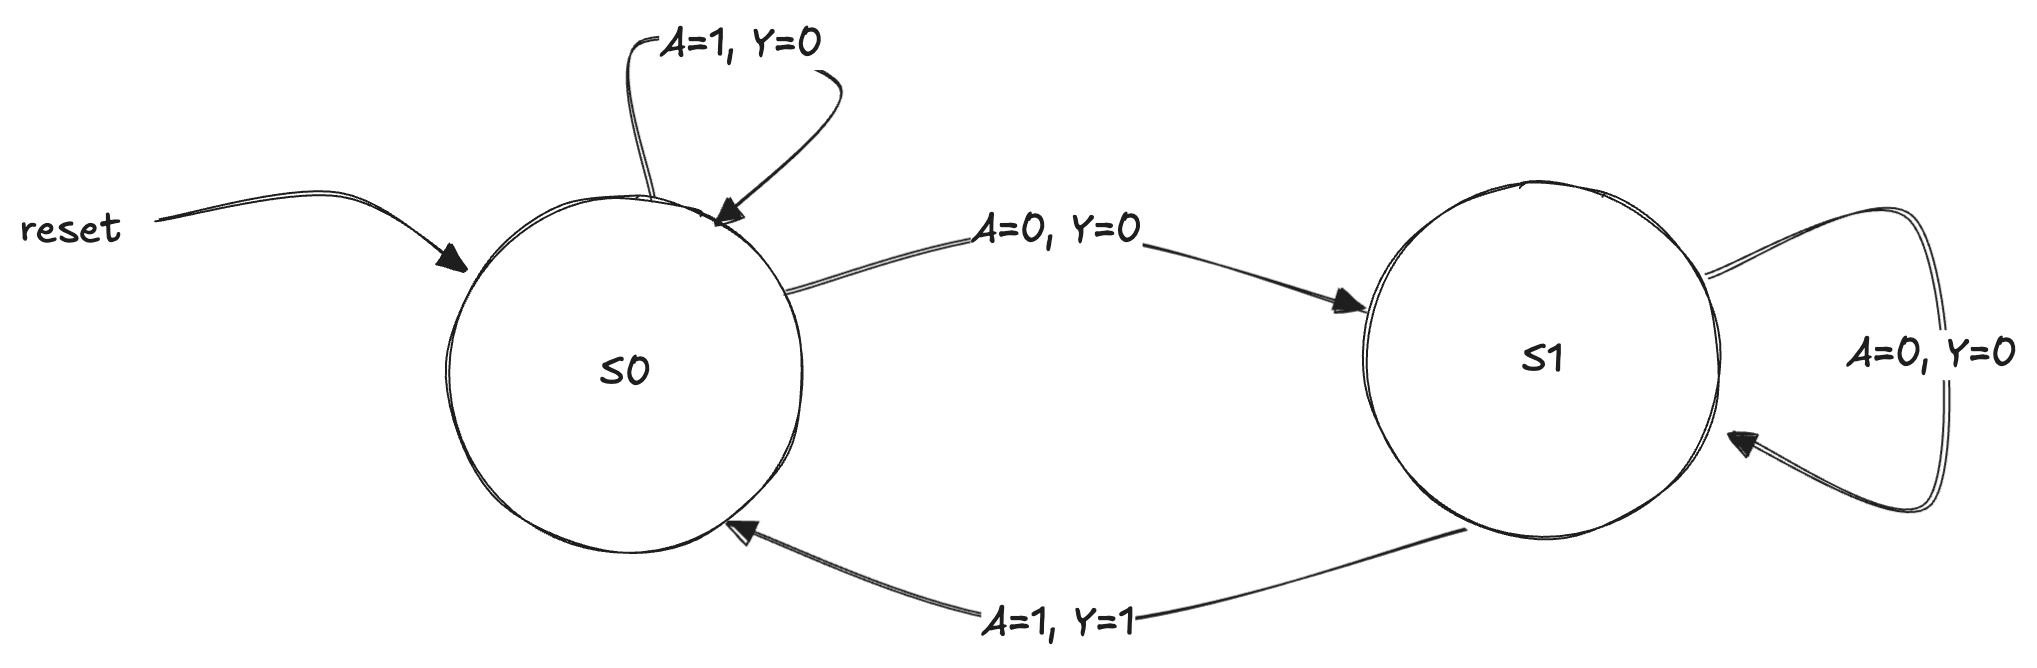

This Mealy machine detects the "01" sequence by using just two states: it moves to state S1 when a 0 is received (remembering that a 0 was seen), and immediately outputs 1 on a transition back to S0 if the next input is 1, because in a Mealy machine the output can depend directly on both the current state and the input.

We can compare the two machines. Starting with the **Moore machine**, we have the following combined state transition and output table:

| $S$ | $A$ | $S'$ | $Y$ |
|:---------------:|:-------:|:--------------:|:--------:|
|       S0        |    0    |      S1        |     0    |
|       S0        |    1    |      S0        |     0    |
|       S1        |    0    |      S1        |     0    |
|       S1        |    1    |      S2        |     0    |
|       S2        |    0    |      S1        |     1    |
|       S2        |    1    |      S0        |     1    |

Using a binary encoding, it requires two bits to represent the three states (S0, S1, S2):

| $S_1$ | $S_0$ | $A$ | $S'_1$ | $S'_0$ | $Y$ |
|:-----:|:-----:|:-------:|:------:|:------:|:--------:|
|   0   |   0   |    0    |   0    |   1    |     0    |
|   0   |   0   |    1    |   0    |   0    |     0    |
|   0   |   1   |    0    |   0    |   1    |     0    |
|   0   |   1   |    1    |   1    |   0    |     0    |
|   1   |   0   |    0    |   0    |   1    |     1    |
|   1   |   0   |    1    |   0    |   0    |     1    |

The equations of the next state S' can be simplified using the fact that state 11 does not exist. Thus, the corresponding next state are don’t cares (not shown in the tables), that we can use to minimize the equations:

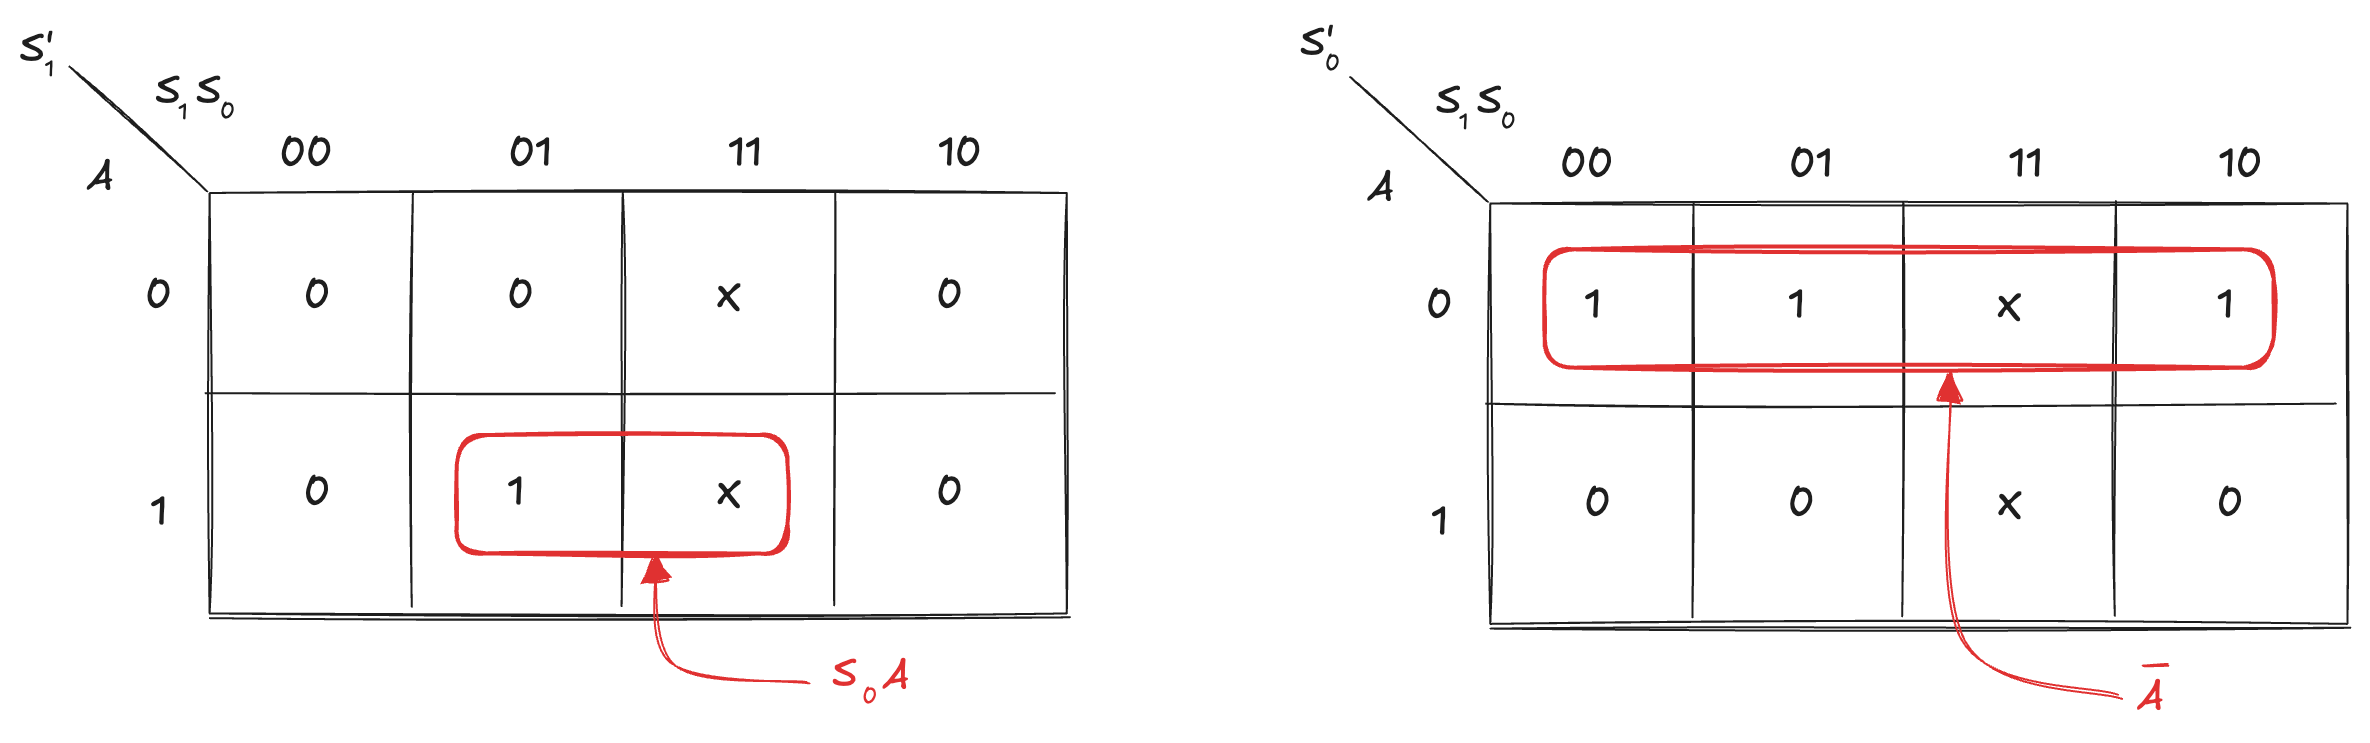

$\displaystyle S_1' = S_0 \: A$   
$\displaystyle S_0' = \overline{A}$          

The output equation can be derived by inspection of the output table:

$\displaystyle Y = S_1$

And the schematic is:

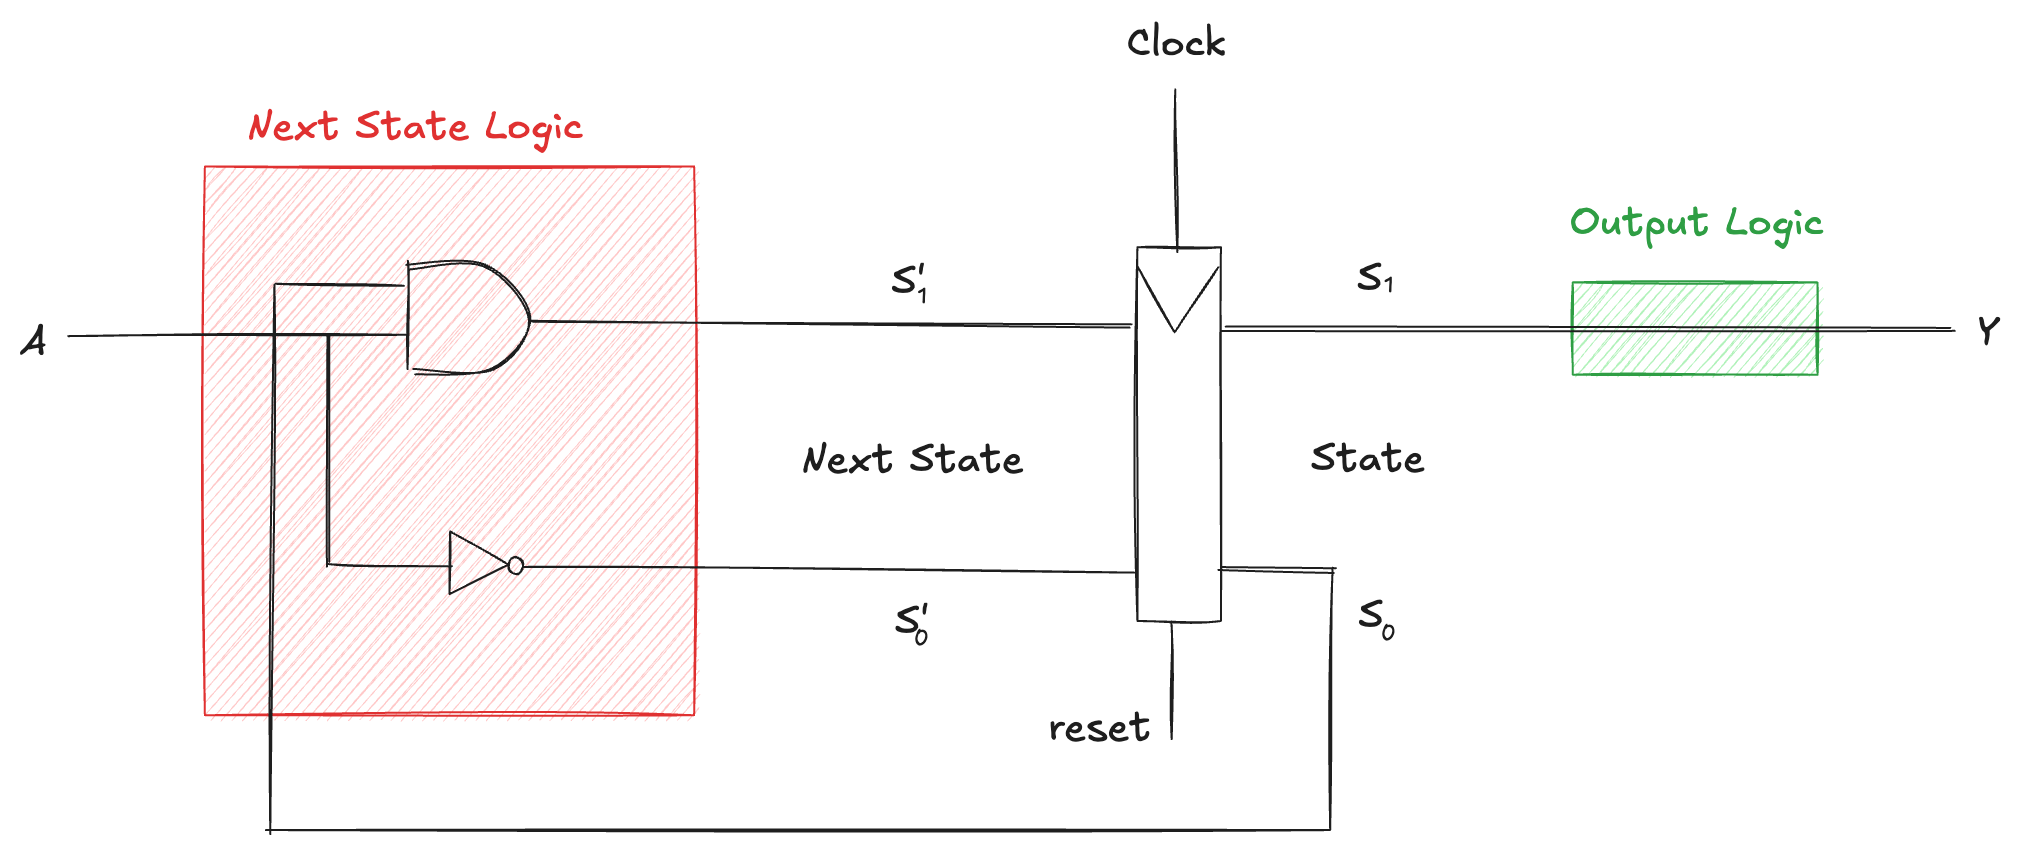

The **Mealy machine** combined state transition and output table is the following:

| $S$ | $A$ | $S$ | $Y$ |
|:---------------:|:-------:|:--------------:|:--------:|
|       S0        |    0    |      S1        |     0    |
|       S0        |    1    |      S0        |     0    |
|       S1        |    0    |      S1        |     0    |
|       S1        |    1    |      S0        |     1    |

It requires only one bit to represent the two states (S0, S1):

| $S_0$ | $A$ | $S'_0$ | $Y$ |
|:---------------:|:-------:|:--------------:|:--------:|
| 0               | 0       | 1              | 0        |
| 0               | 1       | 0              | 0        |
| 1               | 0       | 1              | 0        |
| 1               | 1       | 0              | 1        |

The equations of the next state S' and the output Y are really simple:

$\displaystyle S_0' = \overline{A}$        
$\displaystyle Y = S_0 \; A$       

Fnally, the schematic is:

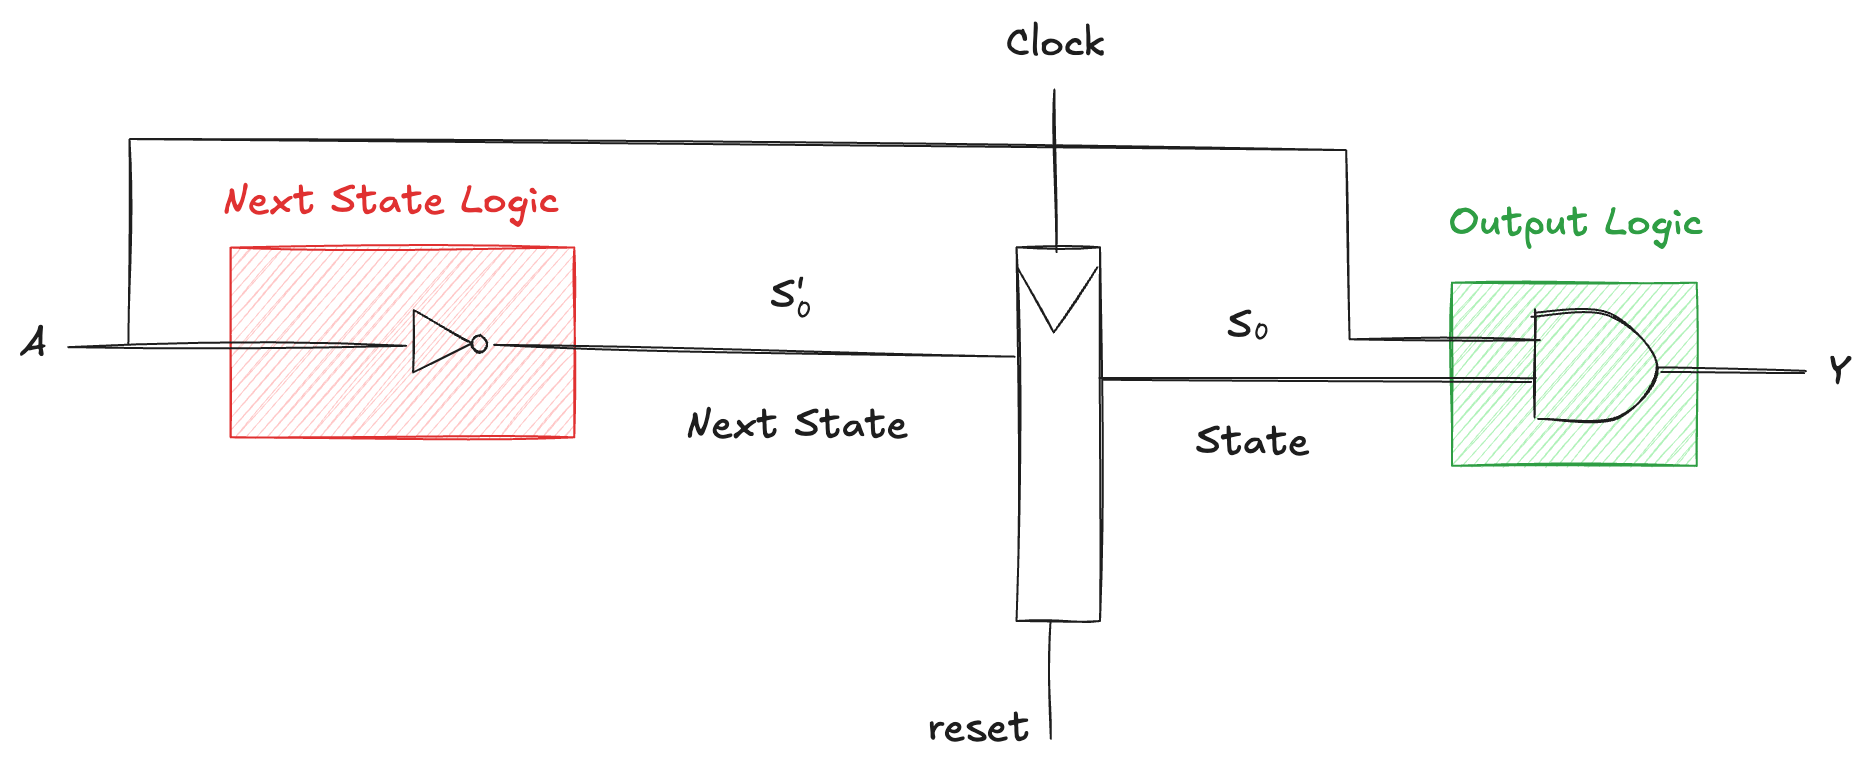

We can consider the timing diagrams for the two machines: 

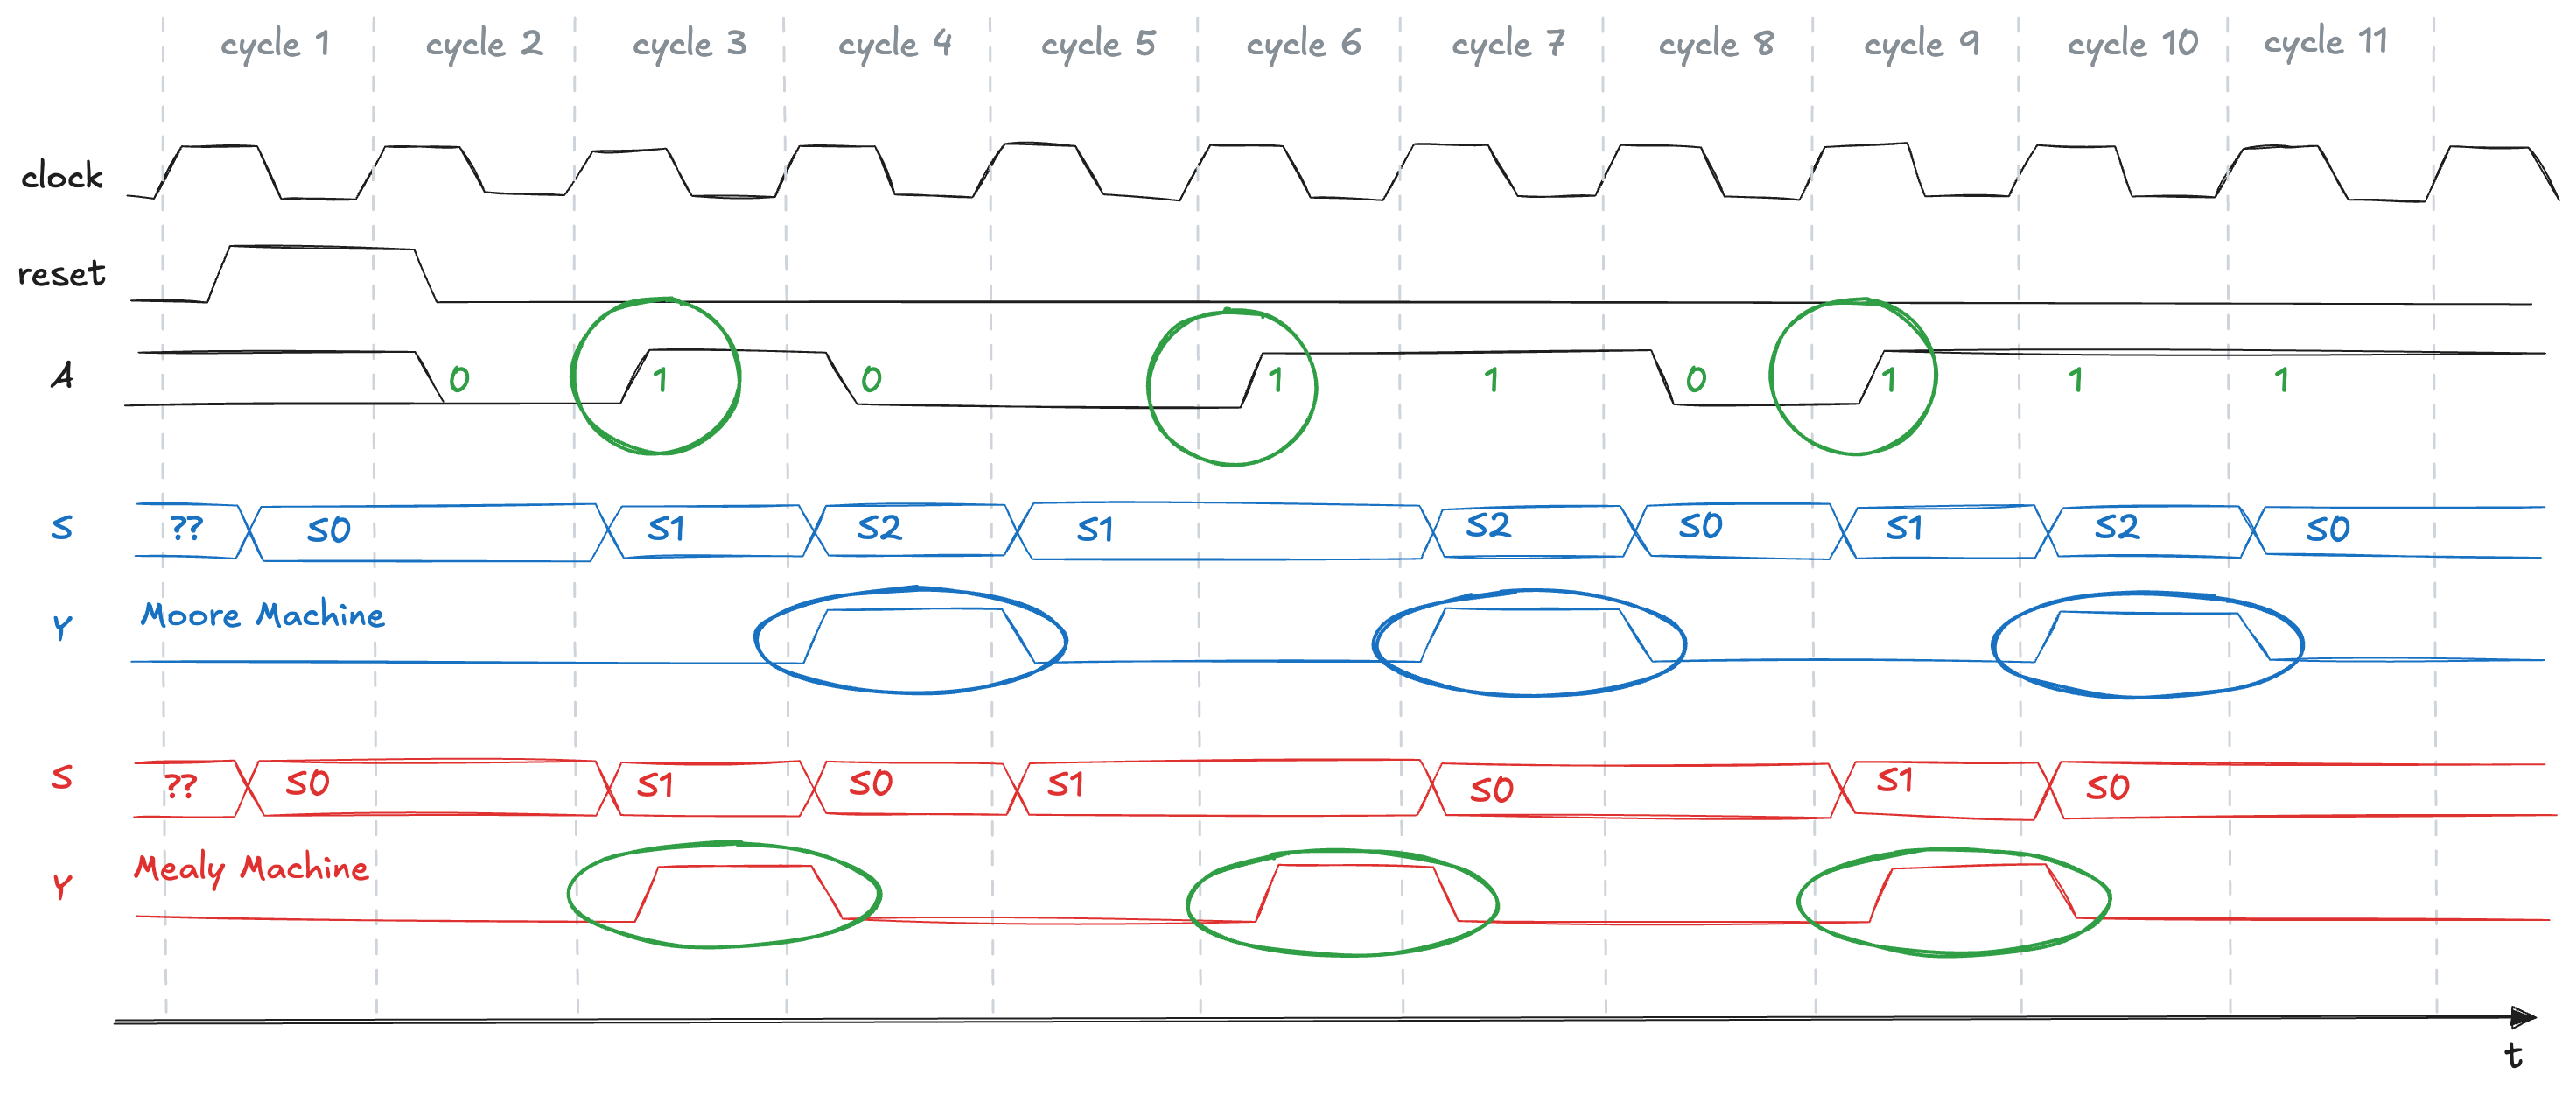

They follow a different sequence of states. The Mealy machine’s output rises a cycle sooner, because **it responds to the input rather than waiting for the state change**. If the Mealy output were delayed through a flip-flop, it would match the Moore output. When choosing our FSM design style, we need to consider **when** we want our outputs to respond!

## Factoring

Designing complex FSMs is often easier when they are **decomposed into multiple simpler, interacting state machines**, where the output of one machine can serve as the input to another. This **hierarchical and modular approach** is known as **state machine factoring**.

For example, suppose to modify the traffic light controller to include an extended mode, which forces the light on side road to remain green for an extended period to accommodate a special condition such as priority vehicles. The controller now includes two additional inputs: E (enter extended mode) and R (reset extended mode). Asserting E for at least one clock cycle activates the extended mode. Asserting R for at least one cycle deactivates it. While in extended mode, the controller executes its normal state sequence until the side road light turns green, then it remains in that state until the mode is cleared. First, we can sketch a state transition diagram for a complete FSM:

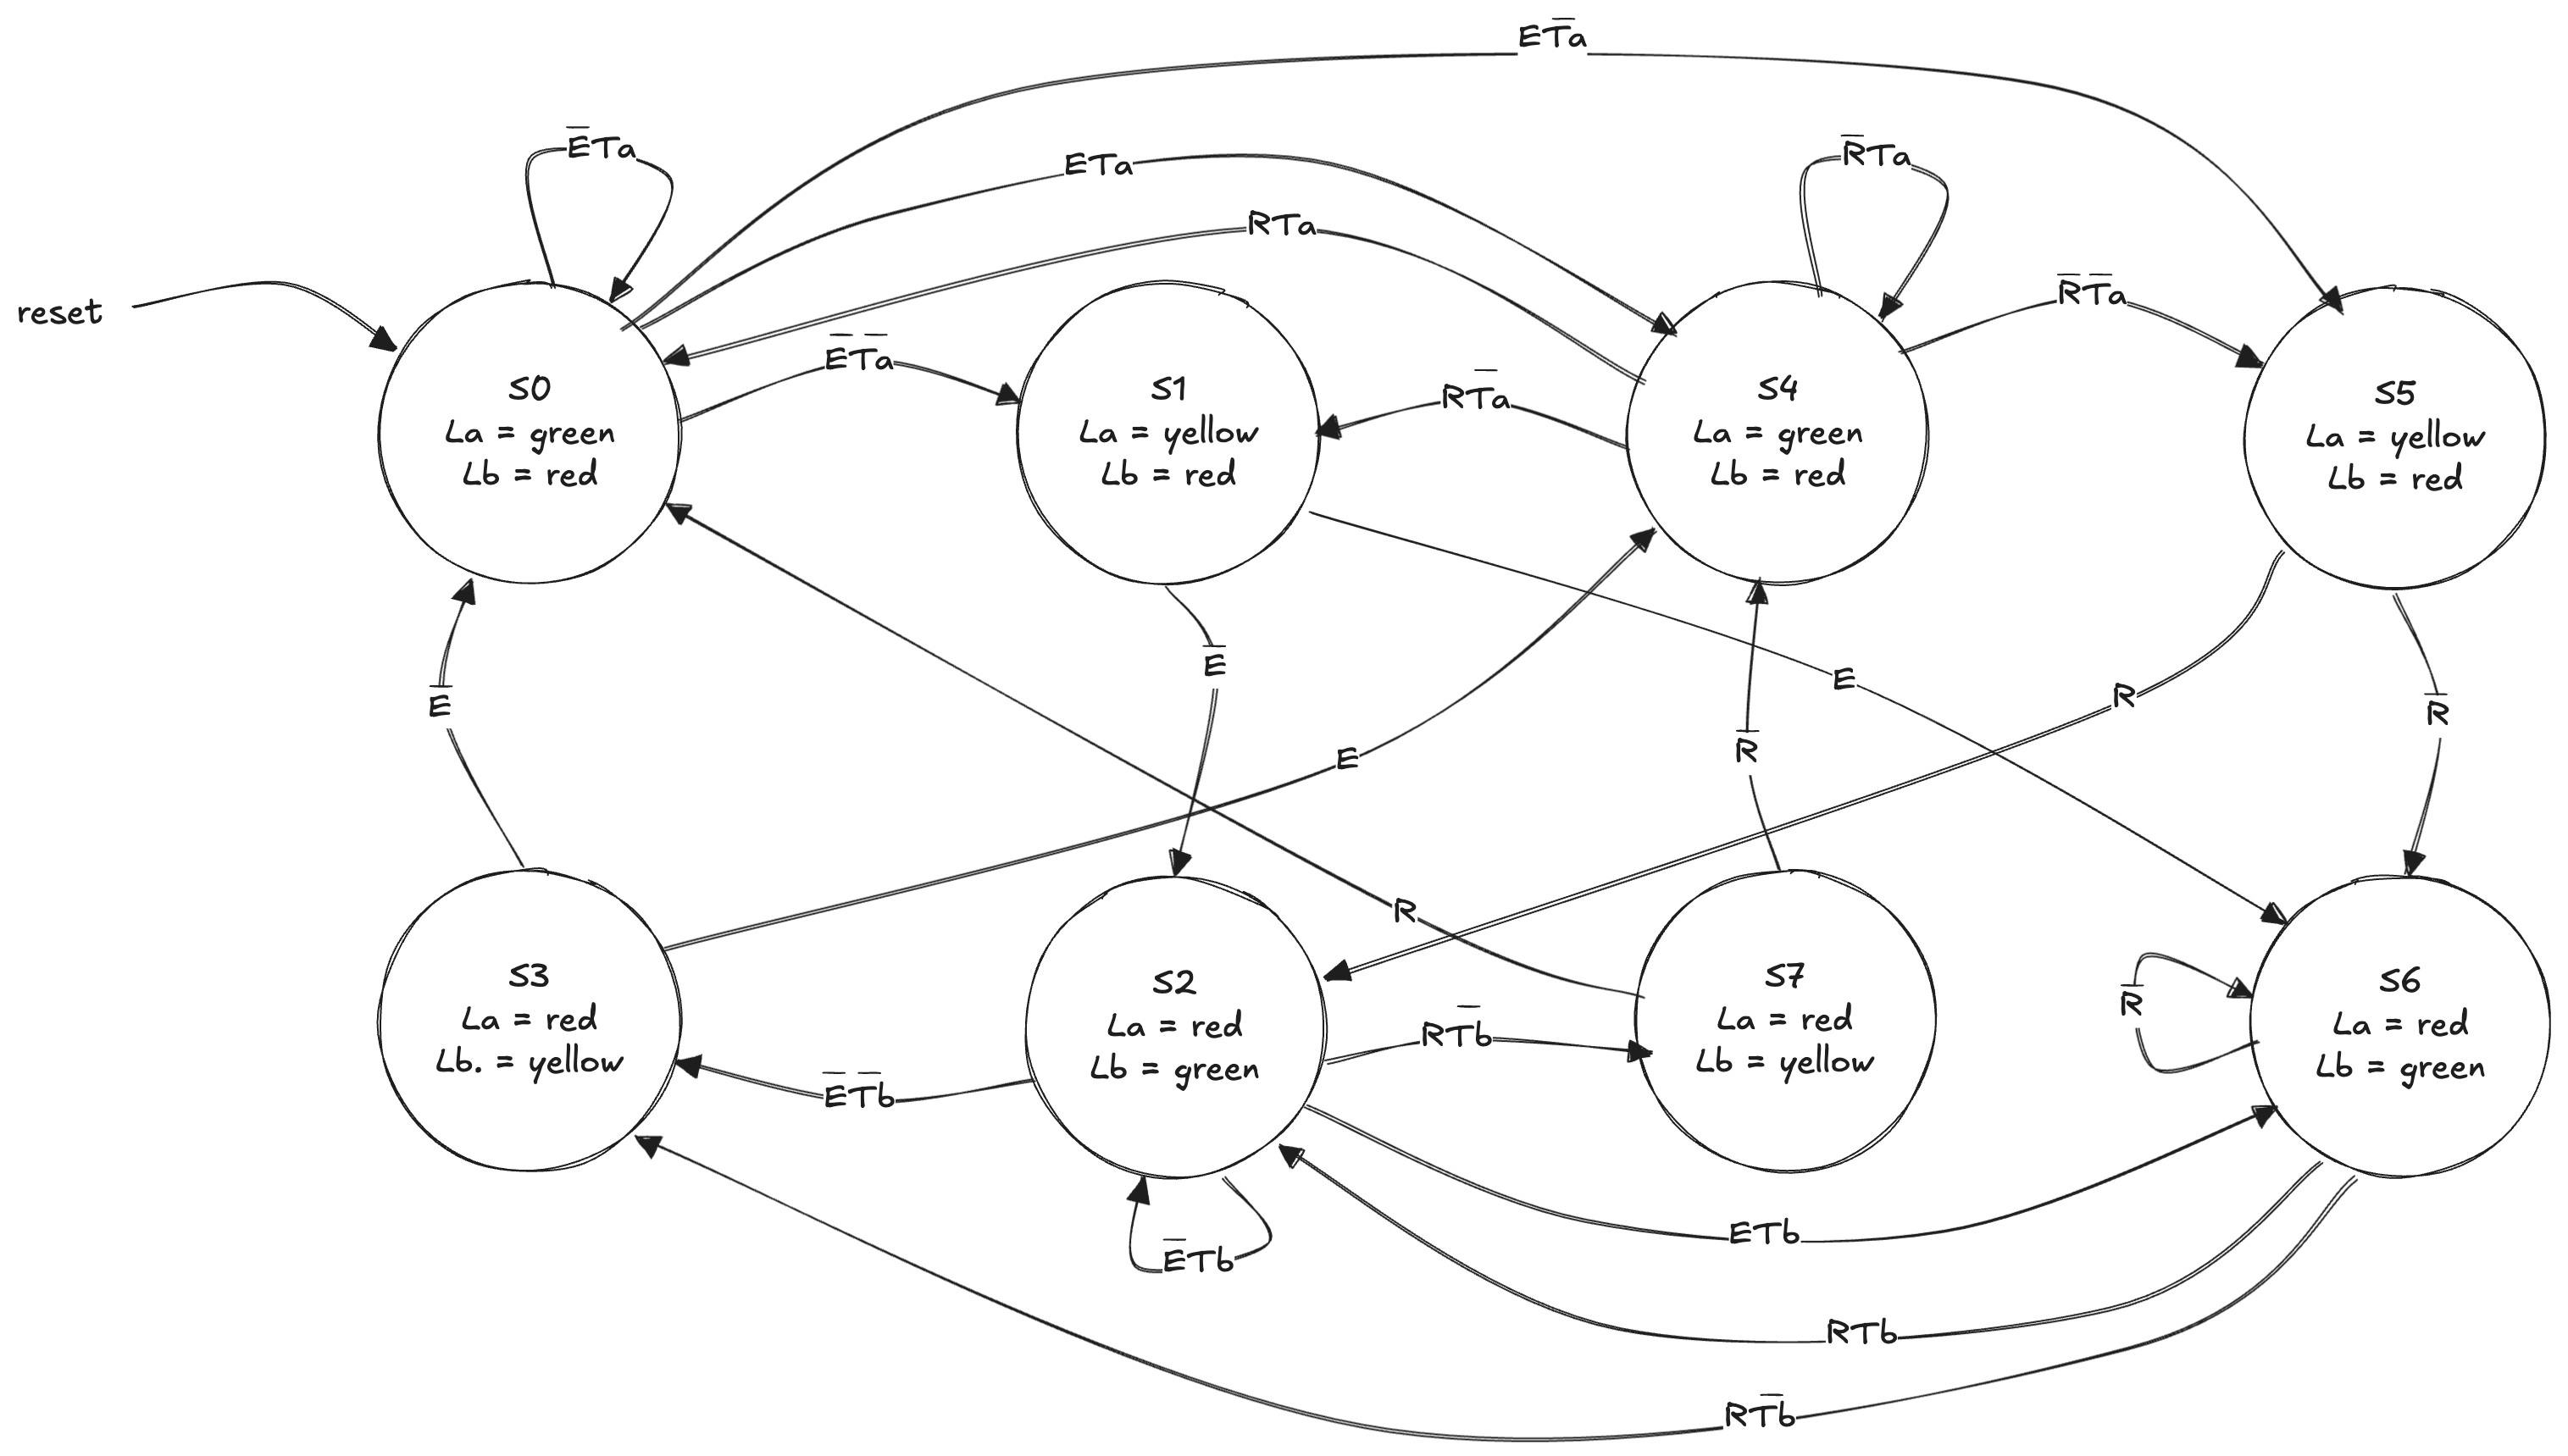

States S0 to S3 handle the normal operating mode, while states S4 to S7 handle the extended mode. The two halves of the state diagram are nearly identical, except that in extended mode the FSM stays in S6 longer, keeping the side road green. The inputs E and R determine when the machine switches between the normal and extended modes. Overall, this FSM is relatively complex and can be tedious to design and verify by hand.

The alternative factored design use **two interacting FSMs**: a Mode FSM and a Lights FSM. The Mode FSM tracks whether the system is in normal or extended mode, while the Lights FSM controls the traffic lights based on the current mode and traffic sensors:

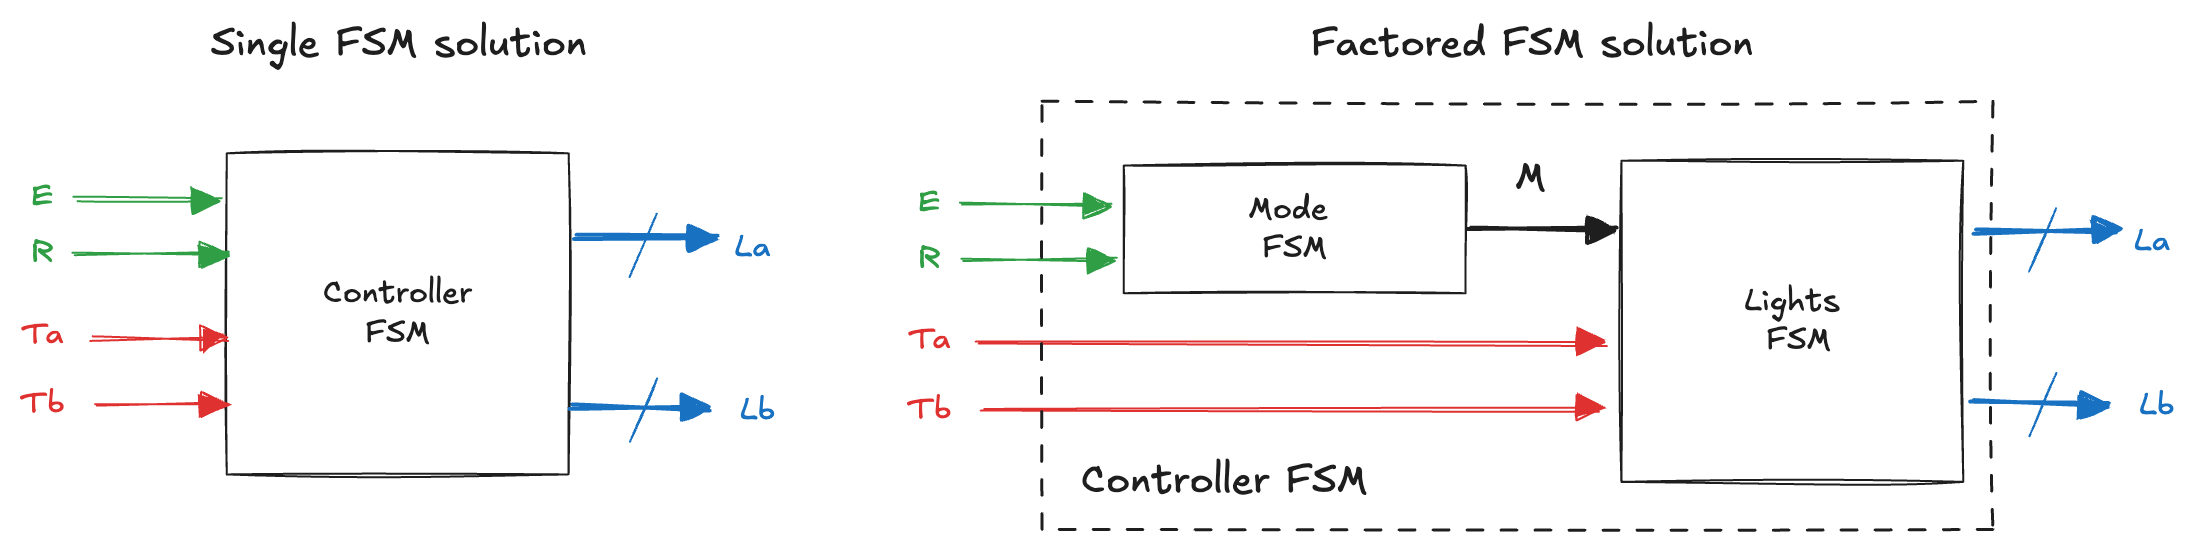

The Mode FSM generates an output signal (M) when the system is in extended mode. The Lights FSM then uses M along with the standard traffic sensors Ta and Tb to control the light sequence accordingly:

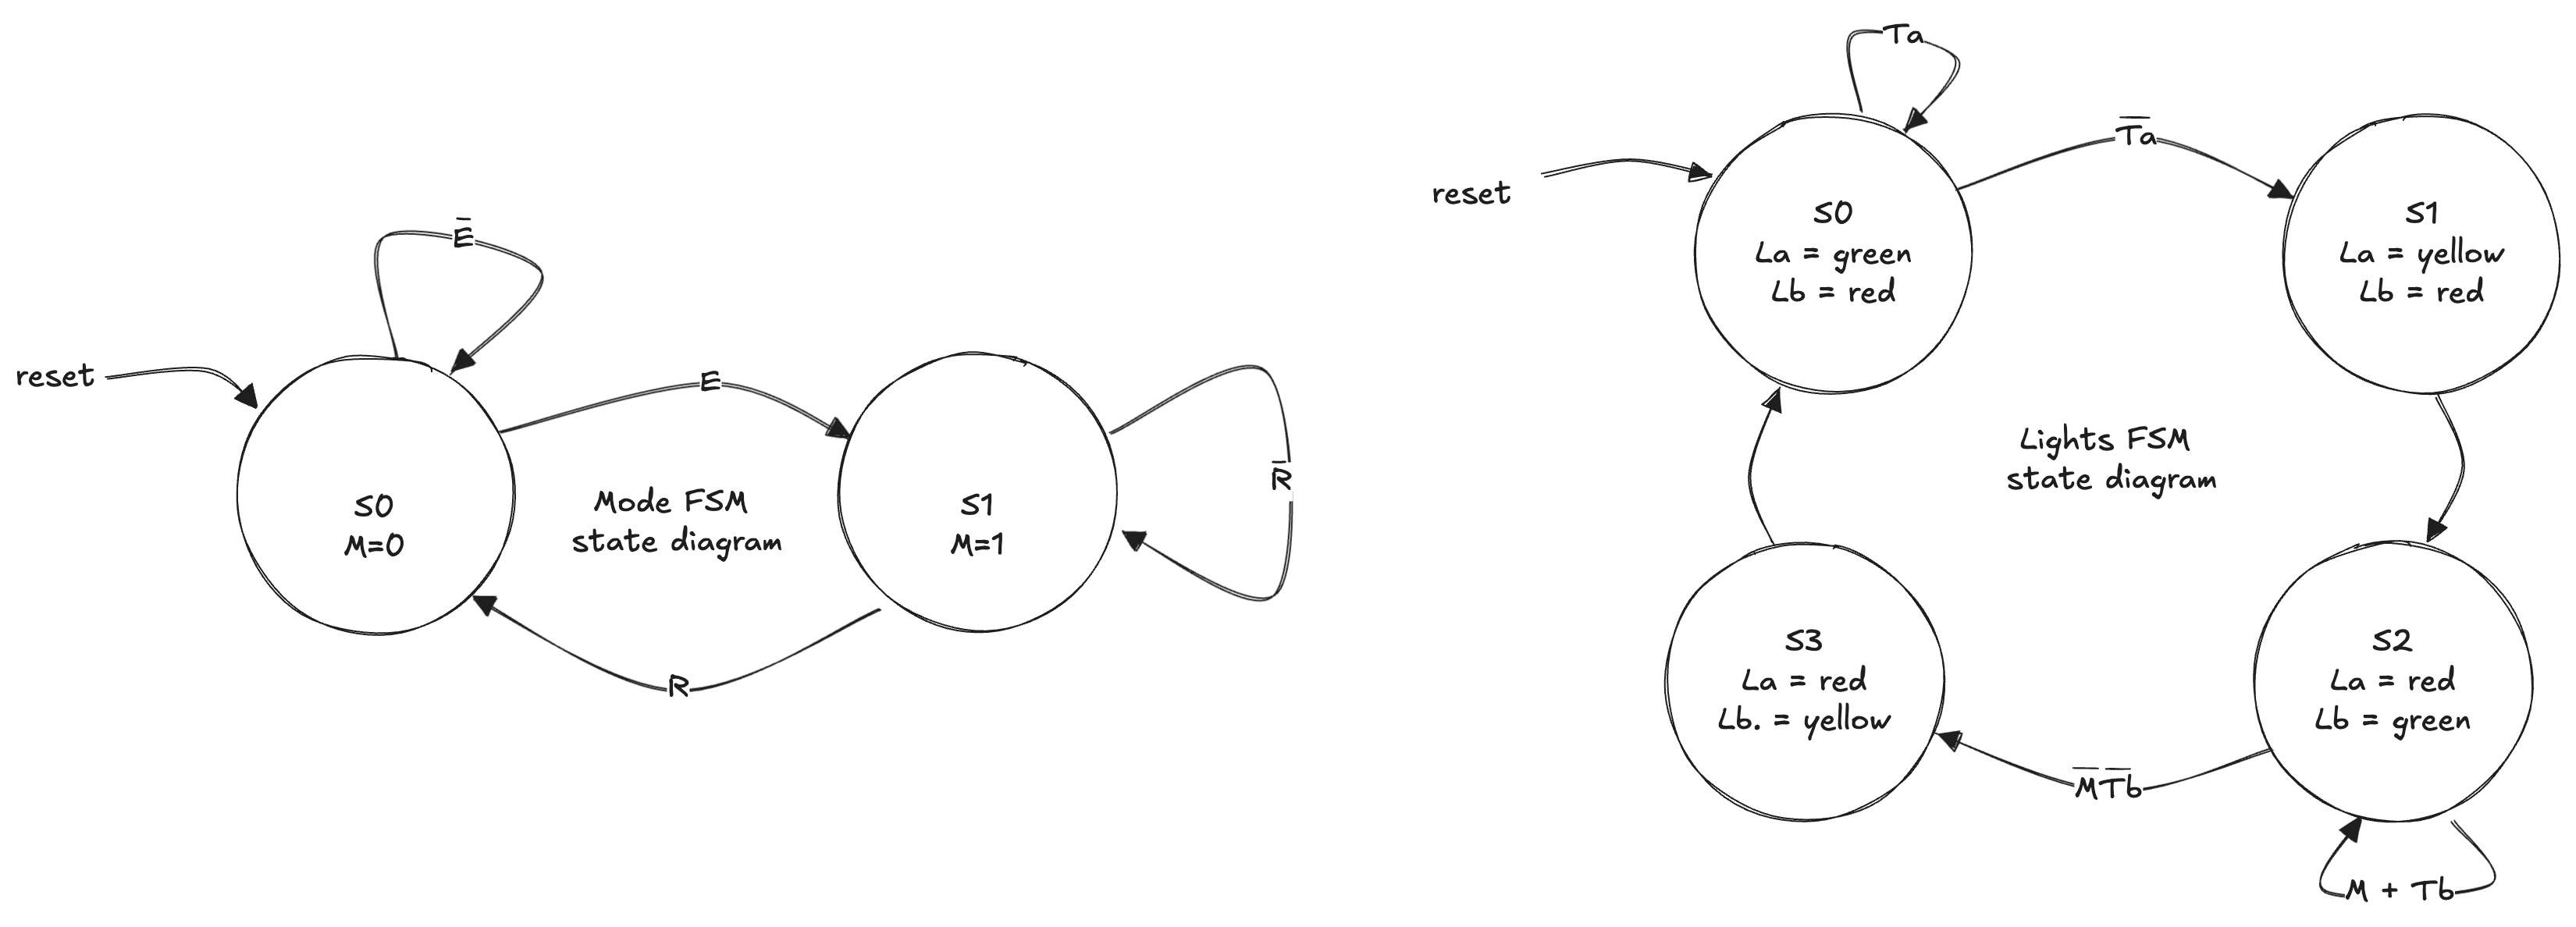

The Mode FSM has two states to track whether the lights are in normal or
extended mode. The Lights FSM is modified to remain in S2 while M is true.

## Deriving the State Diagram from a Schematic

Deriving a state transition diagram from a schematic is essentially the **reverse of the normal FSM design process**. This can be necessary when working with an incomplete design, maintaining legacy hardware, or reverse-engineering an existing circuit. The typical steps are:
- Examine the circuit and identify its inputs, outputs, and state bits.
- Write the next-state and output equations.
- Construct the next-state and output tables.
- Reduce the next-state table by removing unreachable states.
- Assign meaningful names to each valid state bit combination.
- Rewrite the tables using these state names.
- Draw the state transition diagram.
- Summarize, in clear words, what the FSM does.

In the final step, focus on describing the overall function and behavior of the FSM concisely—avoid simply repeating every individual state transition.

For example, we have a keypad lock that no longer responds to the access code and we find a circuit diagram taped to the device: 

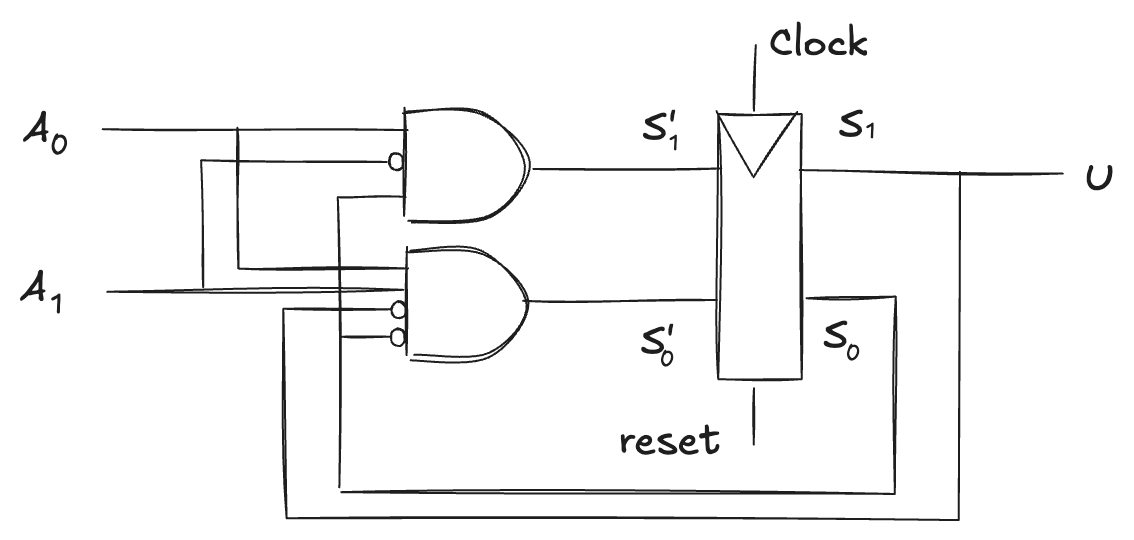

Suspecting that the circuit implements a finite state machine, we decide to derive the state transition diagram in order to analyze how the lock operates and determine how to unlock it.

We begin by examining the circuit. The input is A, and the output is U, probably indicating the "unlock" state. The state bits are already labeled. Since the output depends only on the state bits, this is a Moore machine. From the schematic, we can write the next-state and output equations directly:

$\displaystyle S_1' = S_0 \; \overline{A_1} \; A_0$     
$\displaystyle S_0' = \overline{S_1} \; \overline{S_0} \; A_1 \; A_0$       
$\displaystyle U = S_1$     



Next, we create the next-state and output tables from the equations:

**Next-State Table:**
| $S_1$ | $S_0$ | $A_1$ | $A_0$ | $S'_1$ | $S'_0$ |
|:-----:|:-----:|:-----:|:-----:|:------:|:------:|
|   0   |   0   |   0   |   0   |   0    |   0    |
|   0   |   0   |   0   |   1   |   0    |   0    |
|   0   |   0   |   1   |   0   |   0    |   0    |
|   0   |   0   |   1   |   1   |   0    |   1    |
|   0   |   1   |   0   |   0   |   0    |   0    |
|   0   |   1   |   0   |   1   |   1    |   0    |
|   0   |   1   |   1   |   0   |   0    |   0    |
|   0   |   1   |   1   |   1   |   0    |   0    |
|   1   |   0   |   0   |   0   |   0    |   0    |
|   1   |   0   |   0   |   1   |   0    |   0    |
|   1   |   0   |   1   |   0   |   0    |   0    |
|   1   |   0   |   1   |   1   |   0    |   0    |
|   1   |   1   |   0   |   0   |   0    |   0    |
|   1   |   1   |   0   |   1   |   1    |   0    |
|   1   |   1   |   1   |   0   |   0    |   0    |
|   1   |   1   |   1   |   1   |   0    |   0    |

**Output Table:**
| $S_1$ | $S_0$ | $U$ |
|:-----:|:-----:|:---:|
|   0   |   0   |  0  |
|   0   |   1   |  0  |
|   1   |   0   |  1  |
|   1   |   1   |  1  |

We then reduce the table by removing unused states and combining rows using don’t cares. The state 11 never appears as a possible next state, so any rows with this current state value are eliminated. For the current state value 10, the next state is always 00, regardless of the inputs, so we replace the input values with don’t cares. The resulting simplified tables are:

**Simplified Next-State Table:**
| $S_1$ | $S_0$ | $A_1$ | $A_0$ | $S'_1$ | $S'_0$ |
|:-----:|:-----:|:-----:|:-----:|:------:|:------:|
|   0   |   0   |   0   |   0   |   0    |   0    |
|   0   |   0   |   0   |   1   |   0    |   0    |
|   0   |   0   |   1   |   0   |   0    |   0    |
|   0   |   0   |   1   |   1   |   0    |   1    |
|   0   |   1   |   0   |   0   |   0    |   0    |
|   0   |   1   |   0   |   1   |   1    |   0    |
|   0   |   1   |   1   |   0   |   0    |   0    |
|   0   |   1   |   1   |   1   |   0    |   0    |
|   1   |   0   |   X   |   X   |   0    |   0    |

**Simplified Output Table:**
| $S_1$ | $S_0$ | $U$ |
|:-----:|:-----:|:---:|
|   0   |   0   |  0  |
|   0   |   1   |  0  |
|   1   |   0   |  1  |

We assign names to each valid state: S0 corresponds to 00, S1 to 01, and S2 to 10: 

**State Encoding Table:**
| $S$ | $S_{1:0}$ |
|:-----:|:-------------:|
|   S0  |      00       |
|   S1  |      01       |
|   S2  |      10       |


Now we can rewrite the tables using these state names:

**State Transition Table:**

| $S$   |  $A$  |   $S'$ |
|:-----:|:-----:|:------:|
|   S0  |   0   |   S0   |
|   S0  |   1   |   S0   |
|   S0  |   2   |   S0   |
|   S0  |   3   |   S1   |
|   S1  |   0   |   S0   |
|   S1  |   1   |   S2   |
|   S1  |   2   |   S0   |
|   S1  |   3   |   S0   |
|   S2  |   X   |   S0   |  

**Output Table:**
| $S$ | $U$ |
|:-----:|:---:|
|   S0  |  0  |
|   S1  |  0  |
|   S2  |  1  |





We can draw the state transition diagram: 

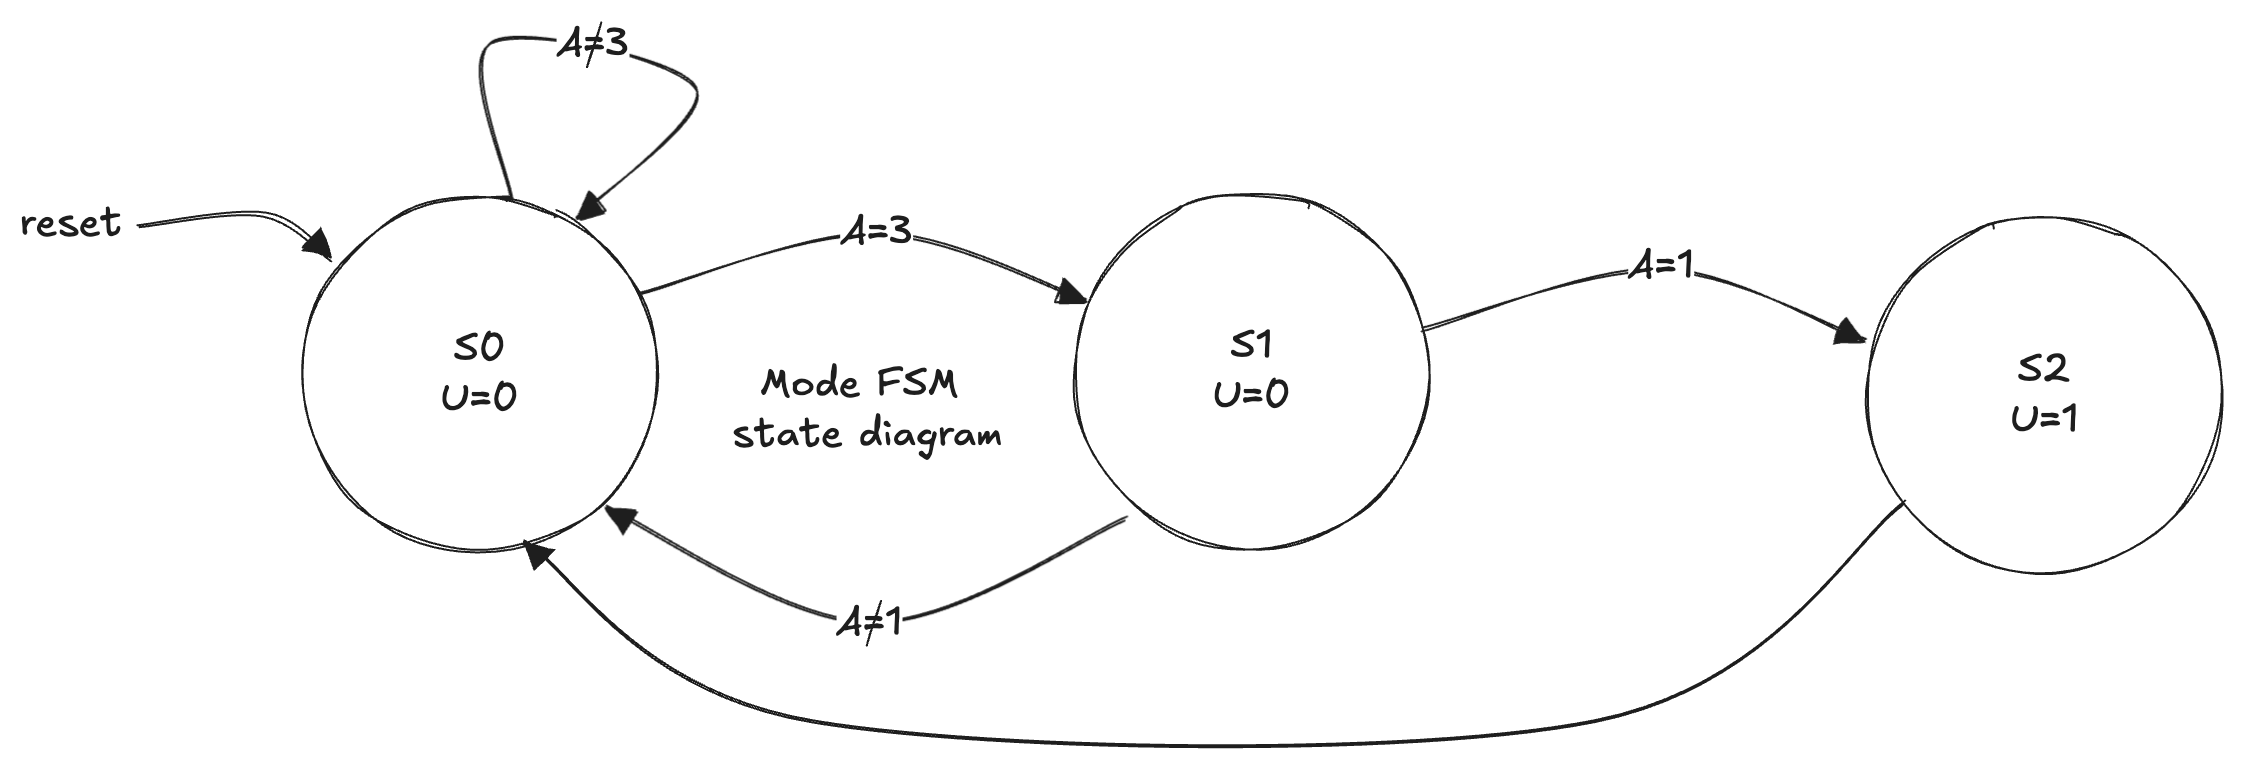

By inspection, we can see that the finite state machine unlocks the door only when it detects an input sequence of A=3 followed by A=1. After this sequence, the door automatically locks again. Testing this code on the keypad confirms that the door opens as expected.

## Conclusion

Finite state machines provide a systematic approach for designing sequential circuits from a clear functional specification. To design an FSM, follow these steps:

- Identify all inputs and outputs.
- Sketch the state transition diagram.
- For a Moore machine, write a separate state transition table and output table.
- For a Mealy machine, write a combined state transition and output table.
- Choose appropriate state encodings, as this choice will affect the resulting hardware.
- Derive the Boolean equations for the next-state and output logic.
- Draw the circuit schematic.

We can use FSMs as a **foundation for designing complex digital systems**.